<a href="https://colab.research.google.com/github/JulioLaz/Supermarket_Sales_Analysis/blob/main/Supermarket_Sales_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Configuración del ambiente

In [ ]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

# Python 3.10.12
# ------
# Name: pandas
# Version: 1.5.3
# ------
# Name: matplotlib
# Version: 3.7.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as mtick
import warnings
import seaborn as sns

In [ ]:
global df_ventas, df_ventas_limpio, df_ventas_año

# 2- Obtención de datos

In [ ]:
def obtencion_datos():
  global df_ventas, df_ventas_limpio

  df_ventas=pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/reporte_ventas.csv')
  return df_ventas

In [ ]:
obtencion_datos()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8949,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Ropa,Jeans,522.75,607.40,0.100,546.66,4,2186.64,95.64
8950,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.58,0.100,17.62,4,70.48,12.32
8951,2021-12-04,2021-12-07,Envío rápido,Isis Alves,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,48.83,63.41,0.000,63.41,6,380.46,87.48
8952,2021-06-15,2021-06-15,24 horas,Gustavo Henrique Porto,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Camisetas,395.45,440.46,0.075,407.43,5,2037.15,59.90


In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

In [ ]:
df_ventas.departamento_producto.unique()

array(['Ropa', 'Productos de Limpieza', 'Electrónicos'], dtype=object)

### Formatar columnas de fechas:
Con la ayuda del método pd.to_datetime transforma las columnas 'fecha_pedido' y 'fecha_envio' que se encuentran como_ texto a formato datetime_ usando el siguiente formato format='%Y-%m-%d'.

In [ ]:
df_ventas_limpio = df_ventas.copy()

# Convierto las columnas 'fecha_pedido' y 'fecha_envio' al formato de fecha y hora:
df_ventas_limpio[['fecha_pedido', 'fecha_envio']] = df_ventas_limpio[['fecha_pedido', 'fecha_envio']].apply(pd.to_datetime,format='%Y-%m-%d')
df_ventas_limpio.sample(5)


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
7816,2020-11-10,2020-11-10,24 horas,Augusto Pinto,B2B,Aracaju,Sergipe,Noreste,Electrónicos,Lámparas LED,9.25,12.17,0.0,12.17,3,36.51,8.76
7366,2022-09-08,2022-09-13,Entrega estándar,Alexandre Farias,B2B,Betim,Minas Gerais,Sureste,Productos de Limpieza,Ambientador en spray,132.60,154.07,0.1,138.66,2,277.32,12.12
7695,2021-01-04,2021-01-09,Entrega estándar,Alice da Luz,B2B,São Bernardo do Campo,São Paulo,Sureste,Electrónicos,Smartphones,55.61,56.82,0.1,51.14,2,102.28,-8.94
2580,2022-06-13,2022-06-20,Entrega estándar,Lucas Azevedo,B2C,Magé,Rio de Janeiro,Sureste,Ropa,Vestidos,28.14,32.28,0.1,29.05,2,58.10,1.82
3855,2020-07-27,2020-08-03,Entrega estándar,Vinicius da Costa,B2C,Salvador,Bahia,Noreste,Productos de Limpieza,Limpiacristales,218.30,285.36,0.0,285.36,2,570.72,134.12


In [ ]:
df_ventas_limpio[['fecha_pedido', 'fecha_envio']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_pedido  8954 non-null   datetime64[ns]
 1   fecha_envio   8954 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 140.0 KB


###Elimina Repetidos:
Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_ventas_limpio.

In [ ]:
#Filas Duplicadas:
df_ventas_limpio.duplicated().sum()

15

In [ ]:
df_ventas_limpio.shape

(8954, 17)

In [ ]:
#Eliminando duplicados:
df_ventas_limpio.drop_duplicates(inplace= True)
df_ventas_limpio.shape

(8939, 17)

###Elimina filas con registros de prueba de la base:
Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

In [ ]:
#Cantidad de valor 'prueba' en filas de la columna['nombre_cliente']:
prueba = df_ventas_limpio['nombre_cliente']=='prueba'
prueba.sum()

4

In [ ]:
df_ventas_limpio[prueba] #visualizo la condició prueba

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
12,2022-04-16,2022-04-21,Entrega estándar,prueba,B2C,São João de Meriti,Rio de Janeiro,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.59,0.1,17.63,3,52.89,9.27
2634,2022-11-19,2022-11-25,Entrega estándar,prueba,B2B,Ribeirão Pires,São Paulo,Sureste,Ropa,Vestidos,13.27,16.80,0.0,16.80,4,67.20,14.12
4001,2022-08-15,2022-08-22,Entrega estándar,prueba,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Zapatillas,471.11,526.74,0.1,474.07,3,1422.21,8.88
4037,2021-11-15,2021-11-19,Entrega estándar,prueba,B2C,Belo Horizonte,Minas Gerais,Sureste,Electrónicos,Lámparas LED,7.22,6.50,0.4,3.90,2,7.80,-6.64


In [ ]:
#Eliminando filas que tiene el valor:'prueba'
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba'].copy()
df_ventas_limpio.shape

(8935, 17)

###Elimina filas con valor nulo en la columna nombre_cliente:
Elimina todos los registros cuyo valor sea nulo en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

In [ ]:
#Cantidad de nulos en la culumna 'nombre_cliente'
nombre_cliente_null=df_ventas_limpio['nombre_cliente'].isnull()
nombre_cliente_null.sum()

2

In [ ]:
df_ventas_limpio[nombre_cliente_null]

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
2495,2022-11-12,2022-11-19,Entrega estándar,NaN,B2B,Goiânia,Goiás,Centro-Oeste,Productos de Limpieza,Bolsas de basura,14.54,19.58,0.1,17.62,2,35.24,6.16
5350,2021-12-12,2021-12-12,24 horas,NaN,B2B,Curitiba,Paraná,Sur,Productos de Limpieza,Detergente para platos,21.54,25.53,0.1,22.98,2,45.96,2.88


In [ ]:
df_ventas_limpio.dropna(subset='nombre_cliente',inplace=True)
df_ventas_limpio.shape

(8933, 17)

###Filtra operaciones sin ganancia:
Quédate sólo con los registros que tengan un valor mayor a cero en la columna 'total_ganancia', continúa guardando el resultado en df_ventas_limpio.

In [ ]:
#Cantidad de opreaciones con ganancia positivas y negativas:
ganancia_positiva=len(df_ventas_limpio.query('total_ganancia > 0'))
ganancia_negativa=len(df_ventas_limpio.query('total_ganancia <= 0'))
print('Tatal de filas: ',ganancia_negativa+ganancia_positiva)
print('Ganancia Positiva: ',ganancia_positiva)
print('Ganancia Negativa: ',ganancia_negativa)

Tatal de filas:  8933
Ganancia Positiva:  7210
Ganancia Negativa:  1723


In [ ]:
#Excluyendo ganancias negativas:
df_ventas_limpio.query('total_ganancia > 0',inplace=True)
df_ventas_limpio.shape[0]

7210

###Actualiza el indice:
Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.

In [ ]:
#Actualizando el index:
df_ventas_limpio.reset_index(drop=True, inplace=True)
# df_ventas_limpio.tipo_producto.unique()
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96


In [ ]:
df_num_clientes= df_ventas_limpio.copy()
# len(df_num_clientes.nombre_cliente.unique())
df_num_clientes['año']=df_num_clientes.fecha_pedido.dt.year

ano_2019=df_num_clientes[df_num_clientes['año']==2019]
ano_2020=df_num_clientes[df_num_clientes['año']==2020]
ano_2021=df_num_clientes[df_num_clientes['año']==2021]
ano_2022=df_num_clientes[df_num_clientes['año']==2022]
clie_2019=len(ano_2019.nombre_cliente.unique())
clie_2020=len(ano_2020.nombre_cliente.unique())
clie_2021=len(ano_2021.nombre_cliente.unique())
clie_2022=len(ano_2022.nombre_cliente.unique())
print('clie_2019: ',clie_2019,'clie_2020: ',clie_2020,'clie_2021: ',clie_2021,'clie_2022: ',clie_2022)

clie_2019:  499 clie_2020:  489 clie_2021:  559 clie_2022:  620


In [ ]:
a=df_num_clientes.groupby('año')['total_venta'].sum()
a

año
2019    1052735.86
2020    1190541.40
2021    1535801.44
2022    1825927.50
Name: total_venta, dtype: float64

In [ ]:
ventas_por_año_clien_saoPaulo = df_num_clientes.groupby('estado').get_group('São Paulo')
ventas_por_año_clien_saoPaulo_jeans = ventas_por_año_clien_saoPaulo[ventas_por_año_clien_saoPaulo['tipo_producto'] == 'Jeans']
ventas_por_año_clien_saoPaulo_jeans

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia,año
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.00,829.53,3,2488.59,373.29,2021
223,2019-11-05,2019-11-10,Entrega estándar,Agatha Ramos,B2B,São Paulo,São Paulo,Sureste,Ropa,Jeans,420.94,486.32,0.05,462.00,1,462.00,41.06,2019
255,2022-09-26,2022-10-02,Entrega estándar,Gustavo Henrique Cavalcanti,B2C,São Paulo,São Paulo,Sureste,Ropa,Jeans,504.57,582.95,0.05,553.80,3,1661.40,147.69,2022
305,2022-01-21,2022-01-24,Económico,Caio Oliveira,B2B,São Paulo,São Paulo,Sureste,Ropa,Jeans,234.25,247.96,0.05,235.56,3,706.68,3.93,2022
310,2021-09-06,2021-09-08,Económico,Gabriel da Paz,B2C,Guarulhos,São Paulo,Sureste,Ropa,Jeans,258.81,275.33,0.00,275.33,3,825.99,49.56,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,2021-02-17,2021-02-21,Entrega estándar,Luigi da Mota,B2C,São Paulo,São Paulo,Sureste,Ropa,Jeans,347.58,389.68,0.05,370.20,3,1110.60,67.86,2021
7076,2022-07-17,2022-07-24,Entrega estándar,Eduarda Ramos,B2C,Santo André,São Paulo,Sureste,Ropa,Jeans,266.08,305.19,0.10,274.67,3,824.01,25.77,2022
7114,2021-08-22,2021-08-26,Entrega estándar,Heitor da Cruz,B2C,São Paulo,São Paulo,Sureste,Ropa,Jeans,262.93,293.05,0.05,278.40,7,1948.80,108.29,2021
7125,2021-07-26,2021-07-29,Económico,Enrico Teixeira,B2B,Sorocaba,São Paulo,Sureste,Ropa,Jeans,301.86,343.02,0.00,343.02,4,1372.08,164.64,2021


In [ ]:
ventas_por_año_clien = ventas_por_año_clien_saoPaulo_jeans.groupby(['año', 'nombre_cliente'])['total_venta'].sum()
ventas_por_año_clien=pd.DataFrame(ventas_por_año_clien)
ventas_por_año_clien

total_venta
año  nombre_cliente                   
2019 Agatha Ramos               462.00
     Alice Ribeiro             3447.00
     Alícia da Mota             550.66
     Ana Vitória Moreira        235.50
     Arthur Pereira            1970.40
...                                ...
2022 Nicole Alves               556.80
     Pedro Henrique Dias        917.91
     Pedro Lucas Ramos          791.80
     Pedro Miguel Correia      2918.00
     Thiago Ramos               435.62

[103 rows x 1 columns]

In [ ]:
ventas_por_año_clien.reset_index('año')
aaa=ventas_por_año_clien.reset_index('nombre_cliente')
aaa['año']=aaa.index
c= aaa['año']==2019
print(len(aaa[c]))
print((aaa[c].total_venta.sum()))
aaa[c]

18
58037.719999999994


,nombre_cliente,total_venta,año
año,,,
2019,Agatha Ramos,462.00,2019
2019,Alice Ribeiro,3447.00,2019
2019,Alícia da Mota,550.66,2019
2019,Ana Vitória Moreira,235.50,2019
2019,Arthur Pereira,1970.40,2019
2019,Benjamin da Mata,587.40,2019
2019,Brenda da Cruz,12870.00,2019
2019,Daniel Nunes,5537.97,2019
2019,Enzo Pires,2608.48,2019


In [ ]:
ventas_por_año_clien['total_venta'].sum()

268811.87999999995

In [ ]:
ventas_por_año_clien = df_num_clientes.groupby(['año','nombre_cliente','estado'])['total_venta'].sum()
ventas_por_año_clien=pd.DataFrame(ventas_por_año_clien)
# ventas_por_año_clien_saoPaulo=ventas_por_año_clien.groupby['estado']
ventas_por_año_clien_saoPaulo = ventas_por_año_clien.groupby('estado').get_group('São Paulo')['total_venta'].sum()
ventas_por_año_clien_saoPaulo

1733616.75

In [ ]:
# ano_2019=df_num_clientes[df_num_clientes['año']==2019 & df_num_clientes['tipo_producto']=='Jeans']
año_clie_jeans_2019 = df_num_clientes[(df_num_clientes['año'] == 2019) & (df_num_clientes['tipo_producto'] == 'Jeans')]
# df_num_clientes[año_clie_jeans]
b=año_clie_jeans_2019.groupby('estado')
b

In [ ]:
año_clie_jeans_2019.total_venta.sum()

147223.58

In [ ]:
lista_años=[2019,2020,2021,2022]
for i in lista_años:
  año_clie_jeans = df_num_clientes[(df_num_clientes['año'] == i) & (df_num_clientes['tipo_producto'] == 'Jeans')]
  cant=len(año_clie_jeans.nombre_cliente.unique())
  print(cant)

62
71
71
79


In [ ]:
df_ventas_limpio.tipo_producto.unique()


array(['Camisetas', 'Jeans', 'Toallitas desinfectantes',
       'Papel higiénico', 'Vestidos', 'Limpiador de inodoros',
       'Cámaras digitales', 'Lámparas LED', 'Ambientador en spray',
       'Zapatillas', 'Smartphones', 'Limpiacristales', 'Bolsas de basura',
       'Cepillos de baño', 'Detergente para platos',
       'Detergente para ropas', 'Laptops'], dtype=object)

In [ ]:
#### Cámaras digitales
lista_años=[2019,2020,2021,2022]
for i in lista_años:
  x = df_num_clientes[(df_num_clientes['año'] == i) & (df_num_clientes['tipo_producto'] == 'Cámaras digitales')]
  cant=len(x.nombre_cliente.unique())
  print(cant)

110
121
129
188


# Preguntas:

##Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

Crea una función pregunta_1(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [ ]:
def pregunta_1():
  global df_ventas_año,df_ventas, df_ventas_limpio
  df_ventas_año=df_ventas_limpio[['fecha_pedido','total_venta']].copy()
  return df_ventas_año

In [ ]:
df_ventas_año=pregunta_1()
df_ventas_año

,fecha_pedido,total_venta
0,2021-11-09,890.66
1,2021-11-09,2488.59
2,2021-06-13,49.72
3,2020-10-12,76.04
4,2019-06-10,166.11
...,...,...
7205,2021-09-30,123.22
7206,2022-11-18,271.97
7207,2022-11-18,700.75
7208,2019-01-22,85.83


Crea una nueva columna en df_ventas_año llamada año y almacena sólo el año de la columna fecha_pedido, puedes usar el siguiente método fecha_pedido.dt.year, luego de realizar esto, elimina la

In [ ]:
#Creando columna año con el valor del año de la columna 'fecha_pedido'
df_ventas_año['año']=df_ventas_año.fecha_pedido.dt.year
df_ventas_año

,fecha_pedido,total_venta,año
0,2021-11-09,890.66,2021
1,2021-11-09,2488.59,2021
2,2021-06-13,49.72,2021
3,2020-10-12,76.04,2020
4,2019-06-10,166.11,2019
...,...,...,...
7205,2021-09-30,123.22,2021
7206,2022-11-18,271.97,2022
7207,2022-11-18,700.75,2022
7208,2019-01-22,85.83,2019


In [ ]:
#Eliminando columna 'fecha_pedido'
df_ventas_año.drop('fecha_pedido', axis=1, inplace=True)
df_ventas_año.sample(5)

,total_venta,año
574,33.40,2022
5419,54.40,2019
2218,191.42,2020
2066,1028.07,2022
5174,1052.19,2021


Ahora, con los datos en df_ventas_año, genera una agrupación por la columna año y sumariza los valores de 'total_venta', para esto necesitarás usar los métodos groupby y aggregate respectivamente, guarda este resultado en df_ventas_año.

In [ ]:
# agrupación por la columna año y sumariza los valores de 'total_venta'
ventas_por_año = df_ventas_año.groupby('año')['total_venta'].sum()
ventas_por_año=pd.DataFrame(ventas_por_año)

# Guardar dataframe como txt para ser leido por la IA:
ventas_por_año.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas.txt', sep='\t')
ventas_por_año

,total_venta
año,
2019,1052735.86
2020,1190541.40
2021,1535801.44
2022,1825927.50


In [ ]:
### Leer desde origen:
df_ventas_leido = pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas.txt', sep='\t')
df_ventas_leido

,año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


In [ ]:
txt_00='0 2019 1052735.86\n1 2020 1190541.40\n2 2021 1535801.44\n3 2022 1825927.50\nSegún los datos proporcionados, parece que ha habido un aumento en las ventas cada año, y las ventas totales más altas se produjeron en 2021 con $153,800,000. Este análisis sugiere que la compañía ha experimentado un crecimiento constante en las ventas durante los últimos tres años, con una ligera caída en 2020 debido a la pandemia.'

##2. Visualización:

In [ ]:
ventas_por_año

,total_venta
año,
2019,1052735.86
2020,1190541.40
2021,1535801.44
2022,1825927.50


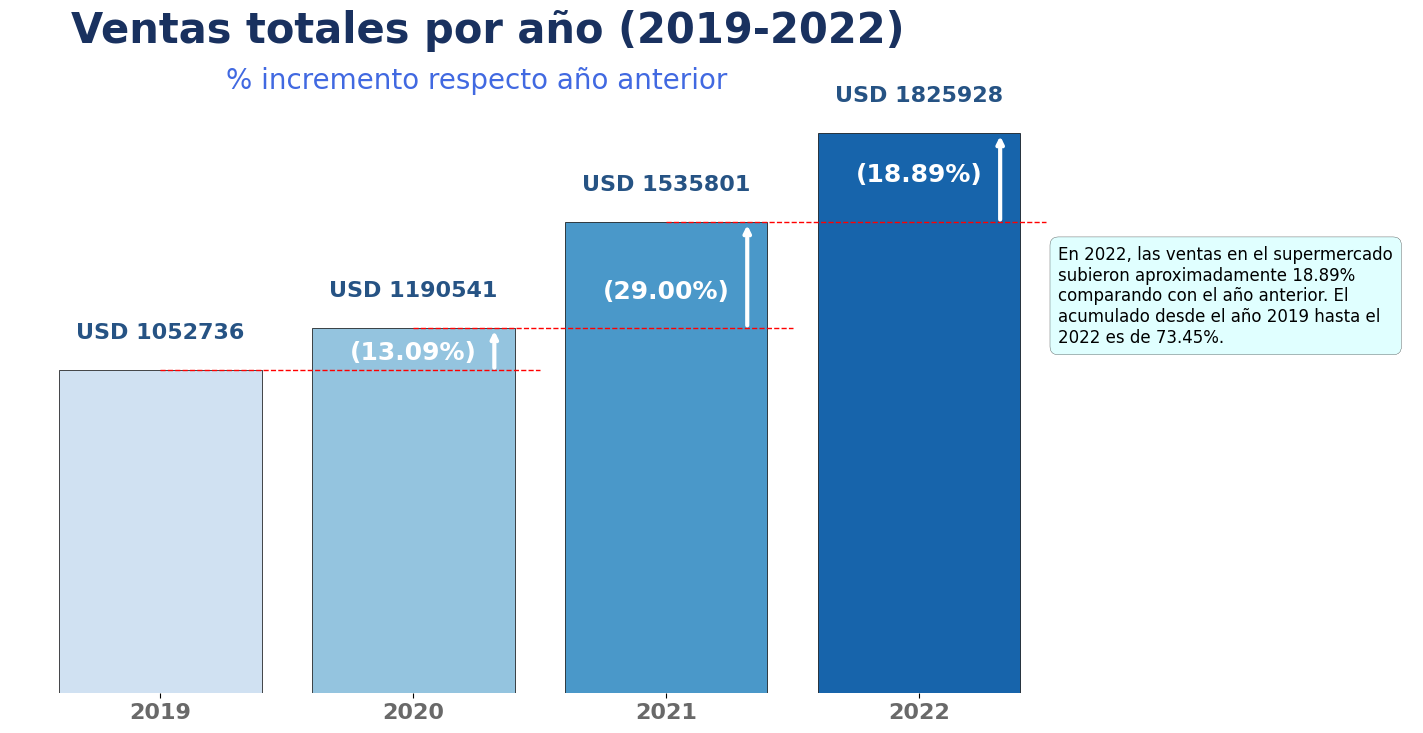

In [ ]:
# Obtener los 10 países más frecuentes
df = ventas_por_año

# Calcular el porcentaje de incremento entre barras consecutivas
df['incremento_porcentual'] = df['total_venta'].pct_change() * 100

# Calcular el porcentaje de incremento entre el año 2019 y 2022:
incremento_total = (df['total_venta'].iloc[-1] - df['total_venta'].iloc[0]) * 100 / df['total_venta'].iloc[0]

# Configurandoo de la gráfica:
ax= plt.figure(figsize=(14, 8))

#Titulo
plt.title('Ventas totales por año (2019-2022)', fontsize=30, color='#19315F', pad=25, fontweight='bold', x=0.44,ha='center')
#Subtitulo:
plt.text(.26, df['total_venta'].max()*1.07, '% incremento respecto año anterior', ha='left', va='bottom', fontsize=20, color='royalblue')  # Invisible para Controlar el ancho de la texto

# Generar paleta de colores
color_palette = sns.color_palette("Blues", n_colors=len(df))


# Añadir líneas horizontales y anotaciones en las barras con el porcentaje de incremento:
lines = []
for i, (valor, incremento) in enumerate(zip(df['total_venta'], df['incremento_porcentual'])):
    bar = plt.bar(i, valor, color=color_palette[i], edgecolor='black',lw=0.5)  # Dibujar la barra
    plt.text(i, valor + 0.05 * max(df['total_venta']),f'USD {valor:.0f}', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')
    plt.text(i, valor -(np.max(df['total_venta'])*incremento/200),f'({incremento:.2f}%)', ha='center', va='bottom', fontsize=18, fontweight='bold', color='white')

    # Agregar la línea horizontal
    if i < len(df) - 1:
        line = plt.hlines(y=valor, xmin=i, xmax=i + 1.5, color='red', linestyle='--', linewidth=1)
        lines.append(line)


# Ancho de texto invisible:
plt.text(4, df['total_venta'].max() * 0.5, '-----------------------------------------', ha='left', va='bottom', fontsize=12, color='white')  # Invisible para Controlar el ancho de la texto

# Ocultar el marco
plt.box(False)

# Ocultar la leyenda
plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
plt.yticks([])
plt.ylabel('')
# plt.xlabel('Año', fontsize=14)
plt.xticks(range(len(df)), df.index,fontsize=16,fontweight='bold',color='dimgray')  # Mostrar etiquetas del eje x con los años

#Agregar insight:
insight = f'En 2022, las ventas en el supermercado subieron aproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% comparando con el año anterior. El acumulado desde el año 2019 hasta el 2022 es de {incremento_total:.2f}%. '
insight_ventas_ano = ""
# plt.text(3.55,df['total_venta'].max()*1.015, '        Conclusión        ', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.2), wrap=True)
plt.text(3.55,df['total_venta'].max()*.8, f'{insight} {insight_ventas_ano}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.5, boxstyle='round', linewidth=.2), wrap=True)

# Añadir anotaciones con flechas para porcentajes respecto al año anterior:
for i, incremento in enumerate(df['incremento_porcentual']):
    if i > 0:
        plt.annotate('' ,xy=(i+0.32, df['total_venta'].iloc[i]), xytext=(i+.32, df['total_venta'].iloc[i-1]),
                     arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->',linewidth=3), ha='center', va='bottom')

plt.ylim(-0.5, (df['total_venta'].max())*1.1) # limites Y
plt.show()


In [ ]:
df_ventas_limpio.head()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08


##Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?
Crea una función pregunta_2(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_top_ganancias y guarda unicamente las columnas 'tipo_producto' y 'total_ganancia'. (Agregado de departamento_producto)

In [ ]:
def pregunta_2():
  global df_top_ganancias,df_ventas_año,df_ventas, df_ventas_limpio
  df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()
  return df_top_ganancias

In [ ]:
df_top_ganancias=pregunta_2()
df_top_ganancias.sample(5)

,tipo_producto,total_ganancia
1038,Lámparas LED,77.91
6819,Limpiador de inodoros,71.28
1689,Smartphones,53.72
3486,Bolsas de basura,17.10
803,Jeans,381.24


In [ ]:
df_top_ganancias.shape

(7210, 2)

In [ ]:
df_top_ganancias.tipo_producto.unique()

array(['Camisetas', 'Jeans', 'Toallitas desinfectantes',
       'Papel higiénico', 'Vestidos', 'Limpiador de inodoros',
       'Cámaras digitales', 'Lámparas LED', 'Ambientador en spray',
       'Zapatillas', 'Smartphones', 'Limpiacristales', 'Bolsas de basura',
       'Cepillos de baño', 'Detergente para platos',
       'Detergente para ropas', 'Laptops'], dtype=object)

Ahora, con los datos en df_top_ganancias, genera una agrupación por la columna tipo_producto y sumariza los valores de 'total_ganancia' y ordena el resultado en orden descendiente por esta última columna, para esto necesitarás usar los métodos groupby, aggregate y sort_values respectivamente, guarda este resultado en df_top_ganancias.

In [ ]:
df_top_ganancias=df_top_ganancias.groupby('tipo_producto')['total_ganancia'].sum()
df_top_ganancias=pd.DataFrame(df_top_ganancias)
df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)
df_top_ganancias.head(7)

,total_ganancia
tipo_producto,
Lámparas LED,111453.41
Laptops,91148.67
Cámaras digitales,80192.63
Smartphones,64705.58
Jeans,55982.95
Detergente para ropas,55766.39
Bolsas de basura,53328.46


In [ ]:
df_top_ganancias.index

Index(['Lámparas LED', 'Laptops', 'Cámaras digitales', 'Smartphones', 'Jeans',
       'Detergente para ropas', 'Bolsas de basura', 'Papel higiénico',
       'Ambientador en spray', 'Vestidos', 'Zapatillas', 'Camisetas',
       'Limpiacristales', 'Limpiador de inodoros', 'Toallitas desinfectantes',
       'Detergente para platos', 'Cepillos de baño'],
      dtype='object', name='tipo_producto')

Por último, selecciona y guarda en df_top_ganancias únicamente los primeros 7 registros.

In [ ]:
df_top_ganancias=df_top_ganancias[:7]
df_top_ganancias.sort_values(by='total_ganancia', ascending=True, inplace=True)
df_top_ganancias.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_top_ganancias.txt', sep='\t')
df_top_ganancias

,total_ganancia
tipo_producto,
Bolsas de basura,53328.46
Detergente para ropas,55766.39
Jeans,55982.95
Smartphones,64705.58
Cámaras digitales,80192.63
Laptops,91148.67
Lámparas LED,111453.41


###2. Visualización:

Crea una figura y un eje con la siguiente configuración:fig, ax = plt.subplots(figsize=(10,4))

Para crear el gráfico de barras horizontal puedes usar lo siguiente:ax.barh(ejeX, ejeY, color=colores, align='center')

In [ ]:
import pandas as pd

tipos_producto_a_verificar = ['Bolsas de basura', 'Detergente para ropas', 'Jeans', 'Smartphones', 'Cámaras digitales', 'laptops', 'Lámparas LED']

# Verificar a qué departamento pertenecen los tipos de productos en la lista
departamentos_pertenecientes = df_ventas_limpio[df_ventas_limpio['tipo_producto'].isin(tipos_producto_a_verificar)]['departamento_producto'].unique()

print("Departamentos a los que pertenecen los tipos de productos:")
print(departamentos_pertenecientes)


Departamentos a los que pertenecen los tipos de productos:
['Ropa' 'Electrónicos' 'Productos de Limpieza']


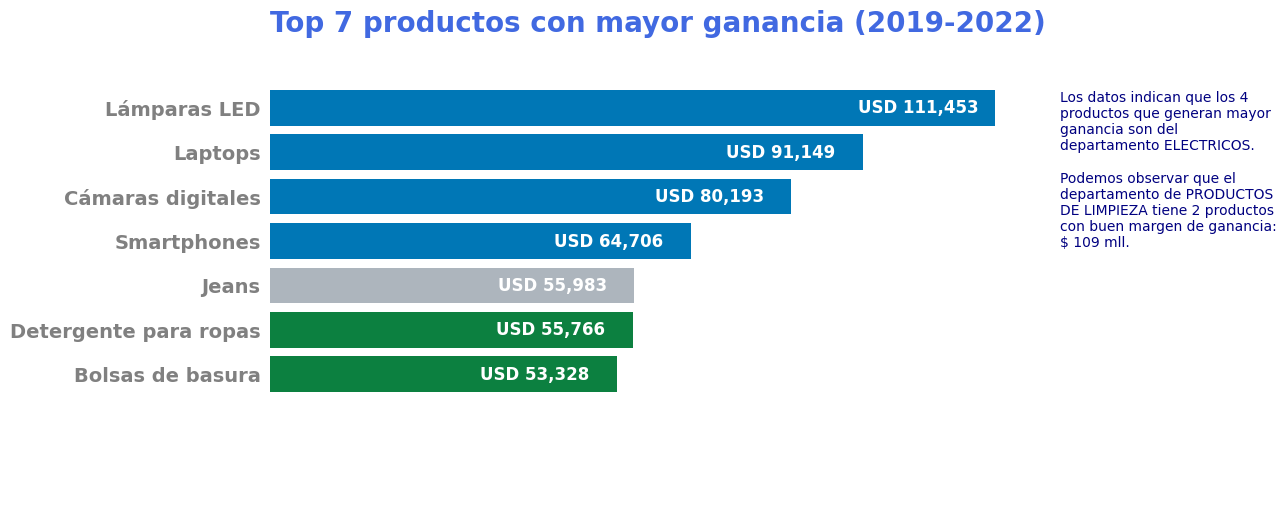

Los datos indican que los 4 productos que generan mayor ganancia son del departamento ELECTRICOS.

Podemos observar que el departamento de PRODUCTOS DE LIMPIEZA tiene 2 productos con buen margen de ganancia: $ 109 mll. 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4))

colores=['#0C8040','#0C8040','#adb5bd','#0077b6','#0077b6','#0077b6','#0077b6']

ax.barh(y=df_top_ganancias.index, width=df_top_ganancias['total_ganancia'], color=colores, align='center', height=0.8)

# títulos de los ejes
ax.set_xlabel('total_ganancia', fontsize=14, fontweight='bold')
ax.set_ylabel('Empresas', fontsize=14, fontweight='bold')

# título
plt.title('Top 7 productos con mayor ganancia (2019-2022)', fontsize=20, color='royalblue', fontweight='bold', pad=40,ha='center')
# plt.title('           Top 7 productos con mayor ganancia (2019-2022)           ', fontsize=30, color='royalblue', fontweight='bold', pad=40)
# plt.suptitle('Industria de Hoteles, Restaurantes y Ocio', fontsize=25, color='#b44c43',y=0.93,x=0.515)

# ver valores al finad de las barras
for i,valor in enumerate(df_top_ganancias['total_ganancia']):
  qtd =  f'USD {valor:,.0f}'
  ax.text(valor-21000,i,qtd, va='center', ha='left', fontsize=12, color='white', fontweight='bold')

ax.margins(x=0.07, y=0.01)
# plt.xticks(fontsize=12)
plt.xticks([])
plt.yticks(fontsize=14, fontweight='bold', color='gray')
plt.box(False)

# Ocultar la leyenda
# plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
# plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

# Seleciion y suma de valores del dpto limpieza:
selected_values = df_top_ganancias.loc[['Bolsas de basura', 'Detergente para ropas'], 'total_ganancia']
total_sum = selected_values.sum()/1000

#Texto insight:
insight=f'Los datos indican que los 4 productos que generan mayor ganancia son del departamento ELECTRICOS.\n\nPodemos observar que el departamento de PRODUCTOS DE LIMPIEZA tiene 2 productos con buen margen de ganancia: $ {total_sum:.0f} mll. '
insight_ventas_mayor_ganancias = ""
# plt.text(max(df_top_ganancias['total_ganancia'])*1.05,6.4, '           Conclusión           ', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.3), wrap=True)
plt.text(max(df_top_ganancias['total_ganancia'])*1.09,6.4, f'{insight} {insight_ventas_mayor_ganancias}', ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', pad=.3, boxstyle='round', linewidth=0), wrap=True, color='navy')
plt.text(max(df_top_ganancias['total_ganancia'])*1.09,2.4, f'-------------------------------------------', ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', pad=.3, boxstyle='round', linewidth=0), wrap=True, color='white')

plt.show()
print(insight)

##Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

Crea una función pregunta_3(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_ventas_año_region y guarda unicamente las columnas 'fecha_pedido','region' y 'total_venta'.

In [ ]:
def pregunta_3():
  global df_ventas_año_region,df_top_ganancias,df_ventas_año,df_ventas, df_ventas_limpio
  df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region', 'total_venta']].copy()
  return df_ventas_año_region
pregunta_3()

,fecha_pedido,region,total_venta
0,2021-11-09,Sureste,890.66
1,2021-11-09,Sureste,2488.59
2,2021-06-13,Sureste,49.72
3,2020-10-12,Sur,76.04
4,2019-06-10,Sureste,166.11
...,...,...,...
7205,2021-09-30,Sureste,123.22
7206,2022-11-18,Noreste,271.97
7207,2022-11-18,Noreste,700.75
7208,2019-01-22,Noreste,85.83


Crea una nueva columna en df_ventas_año_region llamada año y almacena sólo el año de la columna fecha_pedido, puedes usar el siguiente método fecha_pedido.dt.year, luego de realizar esto, elimina la columna fecha_pedido de df_ventas_año_region.

In [ ]:
#Creando columna año con el valor del año de la columna 'fecha_pedido'
df_ventas_año_region['año']=df_ventas_año_region.fecha_pedido.dt.year
df_ventas_año_region

,fecha_pedido,region,total_venta,año
0,2021-11-09,Sureste,890.66,2021
1,2021-11-09,Sureste,2488.59,2021
2,2021-06-13,Sureste,49.72,2021
3,2020-10-12,Sur,76.04,2020
4,2019-06-10,Sureste,166.11,2019
...,...,...,...,...
7205,2021-09-30,Sureste,123.22,2021
7206,2022-11-18,Noreste,271.97,2022
7207,2022-11-18,Noreste,700.75,2022
7208,2019-01-22,Noreste,85.83,2019


In [ ]:
#Eliminando columna 'fecha_pedido'
df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)
df_ventas_año_region

,region,total_venta,año
0,Sureste,890.66,2021
1,Sureste,2488.59,2021
2,Sureste,49.72,2021
3,Sur,76.04,2020
4,Sureste,166.11,2019
...,...,...,...
7205,Sureste,123.22,2021
7206,Noreste,271.97,2022
7207,Noreste,700.75,2022
7208,Noreste,85.83,2019


Por último, genera una tabla cruzada con el método pd.crosstab:

In [ ]:
df_ventas_año_region=pd.crosstab(index = df_ventas_año_region.año, columns = df_ventas_año_region.region, values = df_ventas_año_region.total_venta, aggfunc="sum")
df_ventas_año_region.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas_año_region.txt', sep='\t')

df_ventas_año_region

region,Centro-Oeste,Noreste,Norte,Sur,Sureste
año,,,,,
2019,67406.37,346407.40,71778.74,44189.84,522953.51
2020,90616.80,282431.39,107309.38,61451.04,648732.79
2021,125344.52,359829.92,69534.02,110198.47,870894.51
2022,97679.64,549254.20,99195.86,99393.36,980404.44


In [ ]:
df_t=df_ventas_año_region.T
df_t

año,2019,2020,2021,2022
region,,,,
Centro-Oeste,67406.37,90616.80,125344.52,97679.64
Noreste,346407.40,282431.39,359829.92,549254.20
Norte,71778.74,107309.38,69534.02,99195.86
Sur,44189.84,61451.04,110198.47,99393.36
Sureste,522953.51,648732.79,870894.51,980404.44


In [ ]:
df_ventas_año_region.columns

Index(['Centro-Oeste', 'Noreste', 'Norte', 'Sur', 'Sureste'], dtype='object', name='region')

In [ ]:
#rdenandon df:
df_ventas_año_region=df_ventas_año_region[[ 'Sureste', 'Noreste','Centro-Oeste', 'Norte', 'Sur']]

###2. Visualización:

Para crear el gráfico de columnas apiladas puedes usar lo siguiente:

###Obtener df con columnas de región y ventas totales

In [ ]:
df=df_ventas_año_region.copy()
total_sales = df.sum(axis=0)# volumen de ventas totales por región

df_total_sales_00 = pd.DataFrame({
    'Region': total_sales.index,
    'Total_ventas': total_sales.values
})
df_total_sales_00 = df_total_sales_00.sort_values(by='Total_ventas',ascending=True)
df_total_sales_00['porcentajes_respecto_total']=df_total_sales_00['Total_ventas']/sum(df_total_sales_00['Total_ventas'])

###guardar df
df_total_sales_00.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_total_sales_porcentajes.txt', sep='\t',index=False)

df_total_sales_00


,Region,Total_ventas,porcentajes_respecto_total
4,Sur,315232.71,0.056241
3,Norte,347818.00,0.062055
2,Centro-Oeste,381047.33,0.067983
1,Noreste,1537922.91,0.274384
0,Sureste,3022985.25,0.539337


In [ ]:
###   PREPARAR TEXTO PARA CONSULTAR IA:   ####

import json
txt = pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_total_sales_porcentajes.txt', sep='\t', index_col=False)
txt.reset_index(drop=True, inplace=True) ##sin el índice

lista_datos={'Hacer':'Analiza los porcentajes'}
lista = txt.to_dict(orient='records') # Convertir DataFrame a lista de diccionarios

frase = 'Analiza los porcentajes:'
lista.insert(0, frase) # Agregar la frase al principio de la lista de datos

texto_plano = json.dumps(lista) # Convertir la lista a formato de texto plano (JSON)

texto_plano[1:-1]

'"Analiza los porcentajes:", {"Region": "Sur", "Total_ventas": 315232.71, "porcentajes_respecto_total": 0.0562412776635287}, {"Region": "Norte", "Total_ventas": 347818.0, "porcentajes_respecto_total": 0.0620548822943318}, {"Region": "Centro-Oeste", "Total_ventas": 381047.33, "porcentajes_respecto_total": 0.0679833913475421}, {"Region": "Noreste", "Total_ventas": 1537922.91, "porcentajes_respecto_total": 0.2743838017520836}, {"Region": "Sureste", "Total_ventas": 3022985.25, "porcentajes_respecto_total": 0.5393366469425136}'

###Obtener los valores de porcentajes que superen el 10%

In [ ]:
my_list = []
for region, (nombre, porc) in enumerate(zip(df_total_sales_00['Region'], df_total_sales_00['porcentajes_respecto_total'])):
    if porc > 0.1: ###condición: mayores al 10%
        my_list.append((nombre, porc))

df_porc_mayor=pd.DataFrame(my_list, columns=['Region', 'Porcentaje'])
df_porc_mayor


,Region,Porcentaje
0,Noreste,0.274384
1,Sureste,0.539337


In [ ]:
### otra forma de mostrar los valores mayores (se prefija n=2 por ejempllo)
n_mayores = 2  # El número de mayores valores que deseas obtener
mayores_valores = df_total_sales_00.nlargest(n_mayores, 'Total_ventas')
mayores_valores

,Region,Total_ventas,porcentajes_respecto_total
0,Sureste,3022985.25,0.539337
1,Noreste,1537922.91,0.274384


In [ ]:
porc_acumulado_ventas_region=(mayores_valores['porcentajes_respecto_total'].sum()).round(4)
porc_acumulado_ventas_region

0.8137

In [ ]:
# Sumar todas las columnas para cada fila y almacenar el resultado en una nueva columna 'Total'
df=df_ventas_año_region.copy()
df['Total/1K'] = (df.sum(axis=1))/1000
df['(S-E+N-E/1k)']=(df['Sureste']+df['Noreste'])/1000
df['% S-E+N-E']=((df['(S-E+N-E/1k)']/df['Total/1K'])*100).round(2)
df

region,Sureste,Noreste,Centro-Oeste,Norte,Sur,Total/1K,(S-E+N-E/1k),% S-E+N-E
año,,,,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84,1052.73586,869.36091,82.58
2020,648732.79,282431.39,90616.80,107309.38,61451.04,1190.54140,931.16418,78.21
2021,870894.51,359829.92,125344.52,69534.02,110198.47,1535.80144,1230.72443,80.14
2022,980404.44,549254.20,97679.64,99195.86,99393.36,1825.92750,1529.65864,83.77


In [ ]:

# Sumar los valores de la fila correspondiente al año 2022
x_insight_title = df_ventas_año_region.loc[2022].sum()
x_insight_title

1825927.5

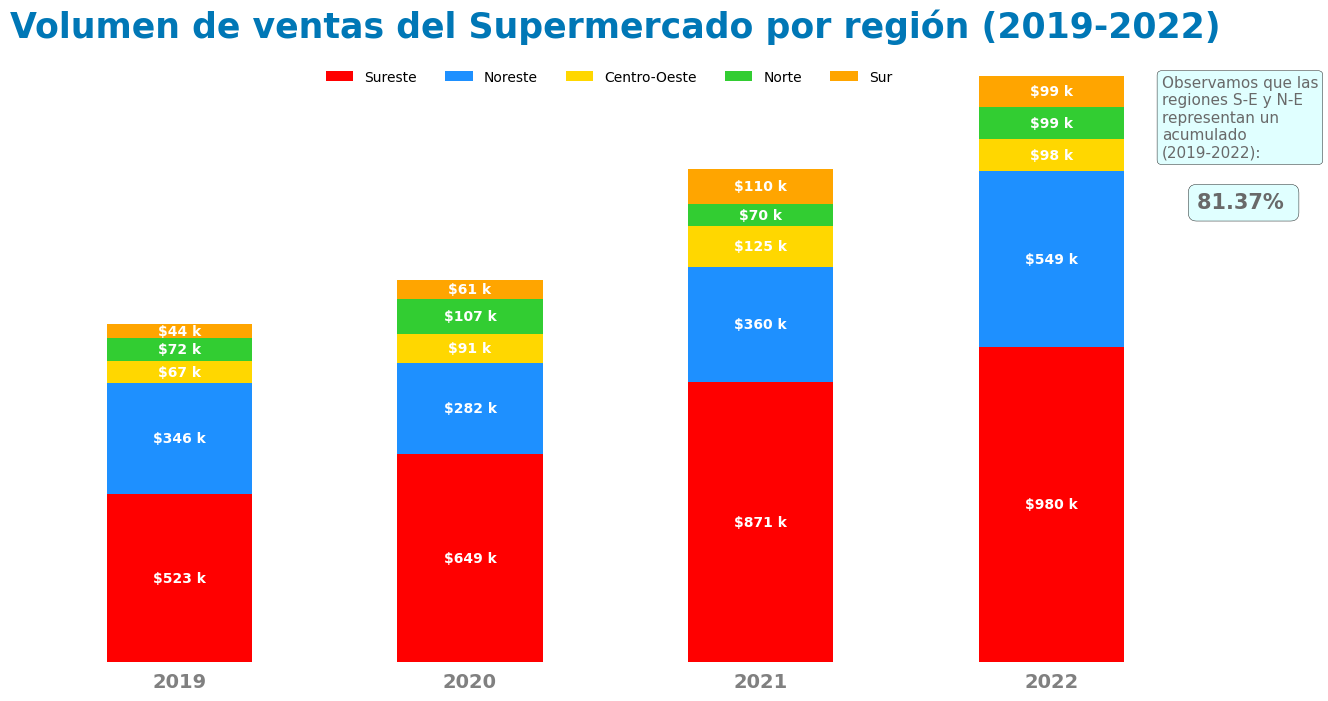

In [ ]:
df=df_ventas_año_region.copy()
df=round(df/1000)
# colores=['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
labels = [ 'S', 'N','C-O', 'N-E', 'S-E']
# colores = [ 'orange' ,'limegreen', 'gold','dodgerblue', 'red']
colores = [ 'red' ,'dodgerblue', 'gold','limegreen', 'orange']

ax = df.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

# Valores en columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='$%0.0f k', fontsize=10, color='white',fontweight='bold')

plt.title('Volumen de ventas del Supermercado por región (2019-2022)',fontsize=25,fontweight='bold',color='#0077b6')

#Agregar insight:
x_insight_title = df_ventas_año_region.loc[2022].sum()
insight_ventas_ano = ''
insight= 'Texto a predecir'
plt.text(3.38,x_insight_title/1000, 'Observamos que las regiones S-E y N-E representan un acumulado (2019-2022):', ha='left', va='top', fontsize=11, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.3), wrap=True,color='dimgray')
plt.text(3.5,x_insight_title*.8/1000, f'{porc_acumulado_ventas_region:.2%} ', ha='left', va='top', fontsize=15, fontweight='bold', bbox=dict(facecolor='lightcyan', pad=.4, boxstyle='round', linewidth=.3), wrap=True,color='dimgray')
# plt.text(3.4,x_insight_title*.7/1000, f'{insight} {insight_ventas_ano}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=0.2), wrap=True)

# Ocultar los valores del eje vertical
plt.box(False) # Ocultar el marco
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=14,rotation=0, fontweight='bold', color='grey')

# LEgend
legend_x = 0.24  # Ajusta la coordenada x de la leyenda
legend_y = 0.95  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=10, ncol=len(df.columns))

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()


In [ ]:
df_ventas_año_region

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


### Grafica adicional de barra paralelas y lineas de tendencias

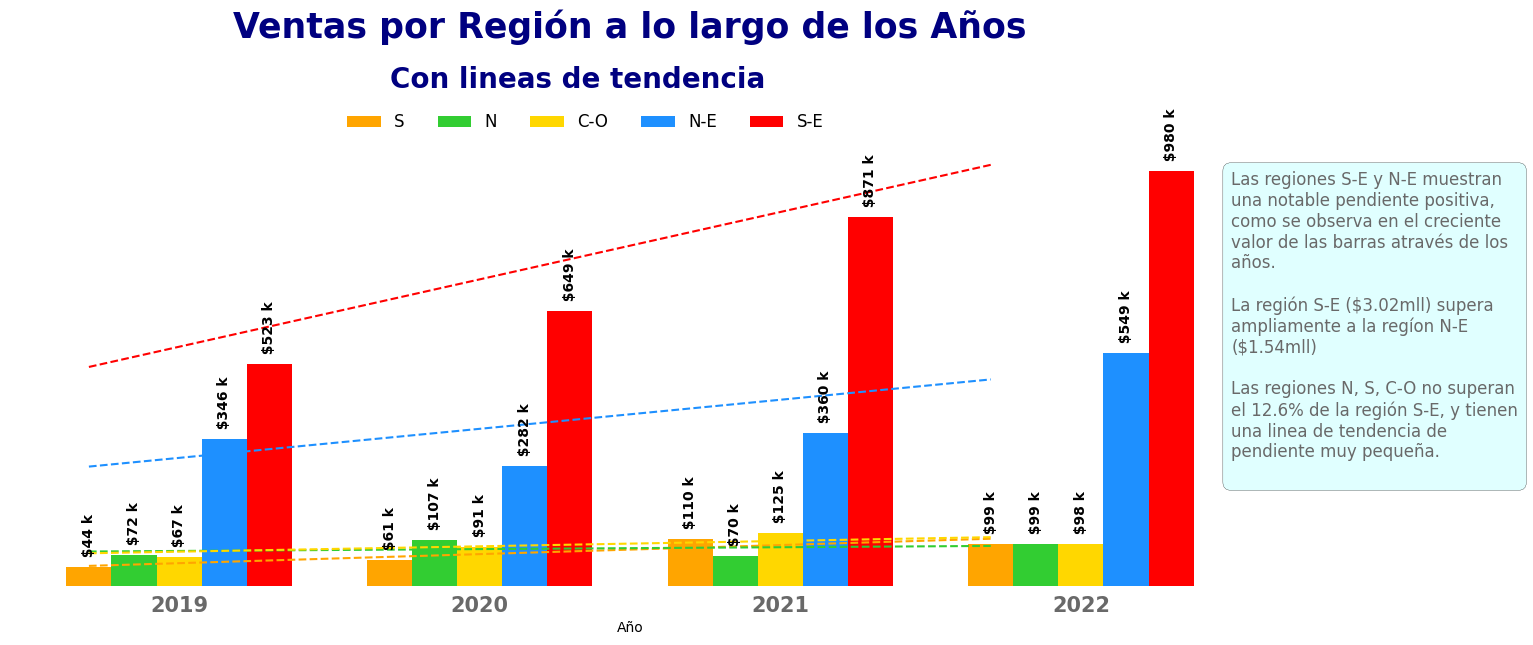

Las regiones S-E y N-E muestran una notable pendiente positiva, como se observa en el creciente valor de las barras através de los años.

La región S-E ($3.02mll) supera ampliamente a la regíon N-E ($1.54mll)

Las regiones N, S, C-O no superan el 12.6% de la región S-E, y tienen una linea de tendencia de pendiente muy pequeña.



In [ ]:
df=df_ventas_año_region.copy()
df=df[['Sur','Norte','Centro-Oeste','Noreste','Sureste']]
df=round(df/1000)

# Colores para la gráfica de barras
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
colores = [ 'red' ,'dodgerblue', 'gold','limegreen', 'orange'][::-1]

labels = ['S-E', 'N-E', 'C-O', 'N', 'S'][::-1]

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(16, 7))

# Configurar la posición de las barras
bar_width = 0.15
bar_positions = np.arange(len(df.index))

# Crear barras para cada región
for i, (region, color) in enumerate(zip(df.columns, colores)):
    ax.bar(bar_positions + i * bar_width, df[region], width=bar_width, label=labels[i], color=color)
    # Ajustar una línea de tendencia lineal y trazarla
    trend_line = np.polyfit(bar_positions, df[region], 1)
    ax.plot(bar_positions, np.polyval(trend_line, bar_positions), color=color, linestyle='dashed')

for container in ax.containers:
    ax.bar_label(container, label_type='edge',fmt='  $%0.0f k', fontsize=10, color='black',rotation=90,fontweight='bold')

# Configurar el eje x
ax.set_xticks(bar_positions + (len(df.columns) - 1) * bar_width / 2)
ax.set_xticklabels(df.index,fontsize=15,color='dimgray',fontweight='bold')

# Configurar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_yticks([])
ax.set_title('Ventas por Región a lo largo de los Años',color='navy',fontweight='bold',fontsize=25)
ax.text(1,df.max().max()*1.2, 'Con lineas de tendencia',color='navy',fontweight='bold',fontsize=20)
#legend
legend_x = 0.26  # Ajusta la coordenada x de la leyenda
legend_y = 0.86 # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df.columns))

ax.text(1,df.max().max(), ' ')

#Agregar insight:
total_SE=df.Sureste.sum()
total_NE=df.Noreste.sum()
total_CO=df['Centro-Oeste'].sum()
porc_variacion=round(total_CO*100/total_SE,2)
insight_01 = f'''Las regiones S-E y N-E muestran una notable pendiente positiva, como se observa en el creciente valor de las barras através de los años.\n
La región S-E (${total_SE/1000:.2f}mll) supera ampliamente a la regíon N-E (${total_NE/1000:.2f}mll)\n
Las regiones N, S, C-O no superan el {porc_variacion}% de la región S-E, y tienen una linea de tendencia de pendiente muy pequeña.
'''
insight_ventas_ano = ""
plt.text(3.8,df.max().max()*.9, '------------------------------------------------------------', ha='left', va='top', wrap=True, color='white')
plt.text(3.8,df.max().max(), f'{insight_01} {insight_ventas_ano}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.5, boxstyle='round', linewidth=.2), wrap=True,color='dimgray')

# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
ax.set_ylim(-0.5,df.max().max()*1.5) # limites Y
plt.ylim(-0.5,df.max().max()*1.3) # limites Y

plt.show()
print(insight_01)

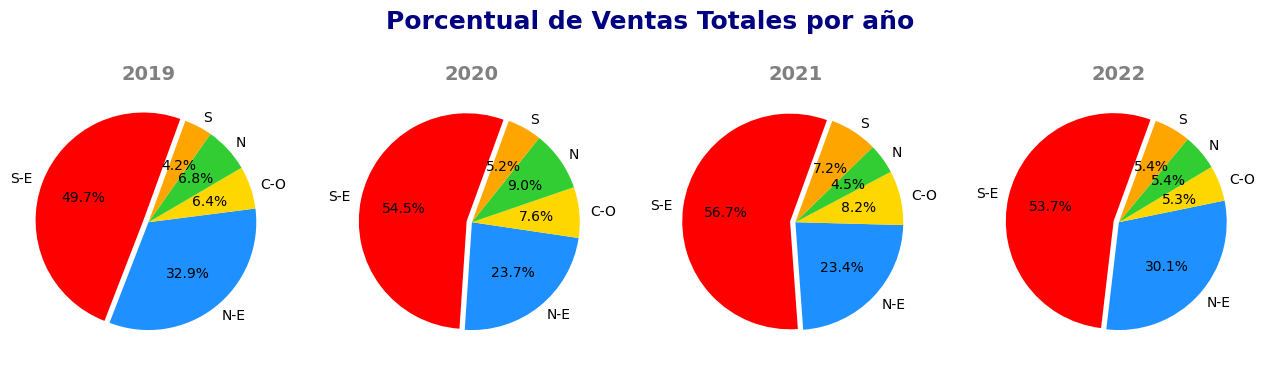

In [ ]:
df=df_ventas_año_region.copy()

# Colores para la gráfica de torta
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
colores = [ 'red' ,'dodgerblue', 'gold','limegreen', 'orange']

labels = [ 'S-E', 'N-E','C-O', 'N', 'S']

# Configuración de la gráfica
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

for i, año in enumerate(df.index):
    ax1 = axs[i]
    explode = (0.05, 0, 0, 0, 0)
    ax1.pie(df.loc[año], labels=labels, autopct='%1.1f%%', startangle=70, colors=colores, explode=explode)
    ax1.set_title(f'{año}',fontsize=14,color='gray',fontweight='bold')

# Título
plt.text(-6.8,1.8,'Porcentual de Ventas Totales por año', fontsize=18,fontweight='bold', color='navy',ha='left')
plt.show()

In [ ]:
df_ventas_año_region

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


###Crear nuevo dataframe con columnas de region y totales de ventas:

In [ ]:
df=df_ventas_año_region.copy()
total_sales = df.sum(axis=0)# volumen de ventas totales por región

df_total_sales = pd.DataFrame({
    'Region': total_sales.index,
    'Total_ventas': total_sales.values
})
df_total_sales = df_total_sales.sort_values(by='Total_ventas',ascending=True)
df_total_sales


,Region,Total_ventas
4,Sur,315232.71
3,Norte,347818.00
2,Centro-Oeste,381047.33
1,Noreste,1537922.91
0,Sureste,3022985.25


###Graficas tipo pie acumulado de ventas por región:

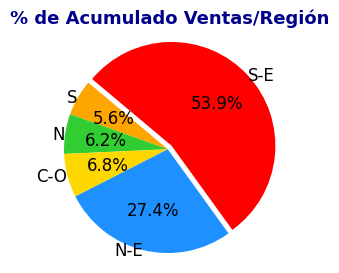

In [ ]:
# Crear un gráfico de torta:
regiones = df_total_sales.Region
labels = [ 'S', 'N','C-O', 'N-E', 'S-E']
# colores = ['#dee2e6', '#adb5bd', '#90e0ef', '#00b4d8', '#0077b6']
colores = [ 'orange' ,'limegreen', 'gold','dodgerblue', 'red']


poblaciones = df_total_sales.Total_ventas

plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0, 0.05)
plt.pie(poblaciones, labels=labels, autopct='%1.1f%%', colors=colores, startangle=140, explode=explode,
        textprops={'fontsize': 12}, labeldistance=1)

plt.title('% de Acumulado Ventas/Región', fontsize=13, color='darkblue',fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo
plt.show()

In [ ]:
df_total_sales['Total_ventas'].max()

3022985.25

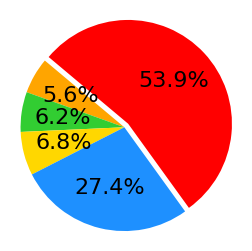

In [ ]:
# Crear un gráfico de torta para insertar el grafica de barras:
regiones = df_total_sales.Region
labels = [ 'S', 'N','C-O', 'N-E', 'S-E']
# colores = ['#dee2e6', '#adb5bd', '#90e0ef', '#00b4d8', '#0077b6']
colores = [ 'orange' ,'limegreen', 'gold','dodgerblue', 'red']

poblaciones = df_total_sales.Total_ventas

plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0, 0.05)
plt.pie(poblaciones, autopct='%1.1f%%', colors=colores, startangle=140, explode=explode,
        textprops={'fontsize': 16})
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo

plt.savefig('/content/drive/MyDrive/Colab Notebooks/acumulado_total_ventas_brasil.png')# Guardo la imagen

plt.show()


###Graficas tipo barras acumulado de ventas por región:

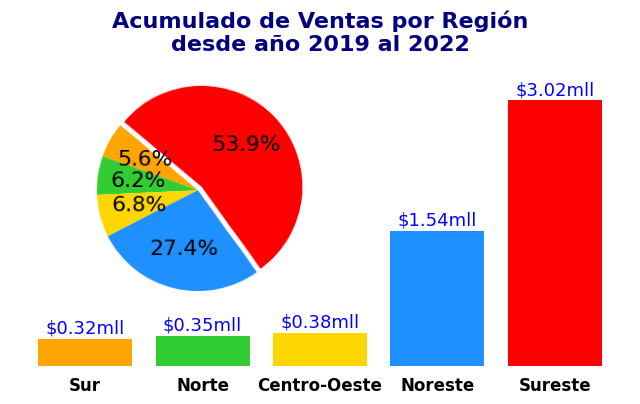

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
colores = [ 'orange' ,'limegreen', 'gold','dodgerblue', 'red']

labels = ['S-E', 'N-E', 'C-O', 'N', 'S']

fig, ax = plt.subplots(figsize=(8, 4))

bar_positions = np.arange(len(df_total_sales['Region']))# Configurar la posición de las barras
ax.bar(bar_positions, df_total_sales['Total_ventas'], color=colores)# Crear barras para cada región

# Configurar el eje x,y
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_total_sales['Region'], fontsize=12, fontweight='bold')
ax.set_yticks([])

# Configurar etiquetas y leyenda
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'Acumulado de Ventas por Región\ndesde año 2019 al 2022', color='navy', fontweight='bold', fontsize=16)

# Mostrar etiquetas en las barras
for i, value in enumerate(df_total_sales['Total_ventas']):
    # ax.text(i, value + 20000, f'${value:,.0f}', ha='center', va='bottom', fontsize=14, color='blue', fontweight='bold')
    ax.text(i, value + 20000, f'${value/1000000:.2f}mll', ha='center', va='bottom', fontsize=13, color='blue')

# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)


# Añadir la imagen graf pie (% cumulado)
img_acumulado='/content/drive/MyDrive/Colab Notebooks/acumulado_total_ventas_brasil.png'
img_ventas = OffsetImage(plt.imread(img_acumulado), zoom=.7)
ab_ventas = AnnotationBbox(img_ventas, (.3, 0.58), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-100)
ax.add_artist(ab_ventas)

# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil.png')

ax.set_ylim(0,35e5)

plt.show()


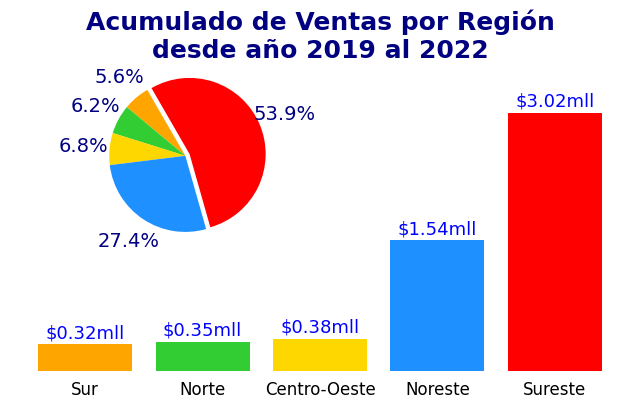

In [ ]:
##3#   GRAFICA DE BARRAS CON GRAFICA PIE   ####

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Datos de la gráfica de barras
# colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
colores = [ 'orange' ,'limegreen', 'gold','dodgerblue', 'red']

labels = ['S-E', 'N-E', 'C-O', 'N', 'S']
bar_positions = np.arange(len(df_total_sales['Region']))
bar_heights = df_total_sales['Total_ventas']

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(bar_positions, bar_heights, color=colores)
plt.box(False)

# Configuraciones de la gráfica de barras
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_total_sales['Region'], fontsize=12)
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'Acumulado de Ventas por Región\ndesde año 2019 al 2022', color='navy', fontweight='bold', fontsize=18,pad=1)

# Mostrar etiquetas sobre las barras
for i, value in enumerate(bar_heights):
    ax.text(i, value + 20000, f'${value/1000000:.2f}mll', ha='center', va='bottom', fontsize=13, color='blue')

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#GRafica pie:
explode = (0, 0, 0, 0, 0.06)  # Separar la primera porción (Sureste)
axins = inset_axes(ax, width="55%", height="55%", loc='upper left', borderpad=0.5)
axins.pie(df_total_sales['Total_ventas'], autopct='%1.1f%%', colors=colores, startangle=120,
          textprops={'fontsize': 14,'color':'navy'}, labels=None, pctdistance=1.35, explode=explode)
axins.axis('equal')


# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil_insertGraf.png')
plt.box(False)
ax.set_ylim(0,36e5)
plt.show()


#INFO: Datos de población por región

#https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=37225&t=resultados ####


In [ ]:
### INFO: https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=37225&t=resultados ####

import pandas as pd
# Datos proporcionados
regiones = ['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']
poblaciones = [17355778,16289538, 54657621, 84840113, 29937706]

df_population = pd.DataFrame({'Region': regiones, 'Population': poblaciones})
df_population.to_csv('/content/drive/MyDrive/Colab Notebooks/poblacion_por_region_brasil_2022.csv', index=False)
df_population['Population_10k']=round(df_population['Population']/10000,0)
df_population['Population_mll']=round(df_population['Population']/1000000,0)
df_population

,Region,Population,Population_10k,Population_mll
0,Norte,17355778,1736.0,17.0
1,Centro-Oeste,16289538,1629.0,16.0
2,Nordeste,54657621,5466.0,55.0
3,Sudeste,84840113,8484.0,85.0
4,Sur,29937706,2994.0,30.0


In [ ]:
region_mapping = {
    'Norte': 'N',
    'Centro-Oeste': 'C-O',
    'Noreste': 'N-E',
    'Sureste': 'S-E',
    'Sur': 'S'
}

df_population['Region_siglas'] = df_population['Region'].replace(region_mapping)
df_population

,Region,Population,Population_10k,Population_mll,Region_siglas
0,Norte,17355778,1736.0,17.0,N
1,Centro-Oeste,16289538,1629.0,16.0,C-O
2,Nordeste,54657621,5466.0,55.0,Nordeste
3,Sudeste,84840113,8484.0,85.0,Sudeste
4,Sur,29937706,2994.0,30.0,S


###Creo Listas de valores y regiones para graficar pie de Población:

In [ ]:
population_list_values = df_population['Population'].values.tolist()
population_list_region = df_population['Region'].values.tolist()
print(population_list_values)
print(population_list_region)


[17355778, 16289538, 54657621, 84840113, 29937706]
['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']


In [ ]:
porc_population_SE=df_population['Population'].max()*100/df_population['Population'].sum()
porc_population_SE

41.77653987067096

In [ ]:
df_population.Region.unique()

array(['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur'],
      dtype=object)

###Creando gráfica pie:

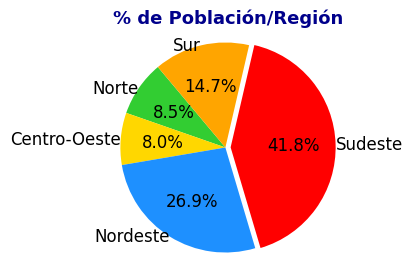

In [ ]:
regiones = population_list_region
colores = ['limegreen', 'gold', 'dodgerblue', 'red', 'orange']
poblaciones = population_list_values

# Crear un gráfico de torta
plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0.05, 0)
plt.pie(poblaciones, labels=regiones, autopct='%1.1f%%', colors=colores, startangle=130, explode=explode,
        textprops={'fontsize': 12}, labeldistance=1)

plt.title('% de Población/Región', fontsize=13, color='darkblue',fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo

plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_poblacion_brasil.png')# Guardo la imagen

plt.show()


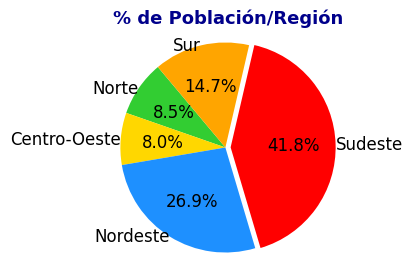

In [ ]:
regiones = population_list_region
# colores = ['#adb5bd', '#90e0ef', '#00b4d8', '#0077b6', '#dee2e6']
colores = ['limegreen', 'gold', 'dodgerblue', 'red', 'orange']

poblaciones = population_list_values

# Crear un gráfico de torta
plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0.05, 0)
plt.pie(poblaciones, labels=regiones, autopct='%1.1f%%', colors=colores, startangle=130, explode=explode,
        textprops={'fontsize': 12}, labeldistance=1)

plt.title('% de Población/Región', fontsize=13, color='darkblue',fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo

plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_poblacion_brasil.png')# Guardo la imagen

plt.show()


###Extrayendo datos del PIB: PRODUCTO INTERNO BRUTO EN USD

In [ ]:
import pandas as pd

# URL de datos:
url = "https://es.wikipedia.org/wiki/Anexo:Estados_de_Brasil_por_PIB_per_c%C3%A1pita_(nominal)"

tablas = pd.read_html(url)
tabla = tablas[0]
df_data_brasil=pd.DataFrame(tabla)
df_data_brasil.head(5)

N.º            Unidad        Región PIB per cápita                        \
  N.º            Unidad        Región            BRL    USD    PPA       %   
0   1  Distrito Federal  Centro-Oeste         119649  23181  46304  245.04   
1   2         São Paulo       Sudeste          72647  14075  28114  148.78   
2   —           Sudeste       Sudeste          61828  11979  23927  126.62   
3   —      Centro-Oeste  Centro-Oeste          60454  11713  23396  123.81   
4   3    Santa Catarina           Sur          59872  11600  23170  122.62   

  PIB (BRL) Población (2022) Comparable (USD) Comparable (PPA)  
  PIB (BRL) Población (2022) Comparable (USD) Comparable (PPA)  
0    337060          2817068             Omán         Lituania  
1   3227031         44420459            Chile          Uruguay  
2   5245944         84847187       Kazajistán           México  
3    984671         16287809       Kazajistán           México  
4    455600          7609601       Kazajistán           México

###Crearndo DF con valores del PIB por region:

In [ ]:
regiones_interes = ['Centro-Oeste', 'Sudeste', 'Sur', 'Norte', 'Nordeste']
df_pib_usd_region = df_data_brasil[df_data_brasil[('Unidad', 'Unidad')].isin(regiones_interes)][[('Unidad', 'Unidad'), ('PIB per cápita', 'USD'), ('Población (2022)','Población (2022)')]]
df_pib_usd_region.reset_index(drop=True,inplace=True)
df_pib_usd_region

,Unidad,PIB per cápita,Población (2022)
,Unidad,USD,Población (2022)
0,Sudeste,11979,84847187
1,Centro-Oeste,11713,16287809
2,Sur,10985,29933315
3,Norte,6683,17349619
4,Nordeste,4910,51517071


In [ ]:
df_pib_usd_region['PIB per cápita'].max()[0]

11979

###Ordenando el dataset con sort_values column 'USD':

In [ ]:
df_pib=df_pib_usd_region[('PIB per cápita','USD')]
df_order = df_pib_usd_region.sort_values(by=('PIB per cápita','USD'),ascending=True)
df_order

,Unidad,PIB per cápita,Población (2022)
,Unidad,USD,Población (2022)
4,Nordeste,4910,51517071
3,Norte,6683,17349619
2,Sur,10985,29933315
1,Centro-Oeste,11713,16287809
0,Sudeste,11979,84847187


In [ ]:
region=df_order['Unidad']
PBI=df_order['PIB per cápita']
poblacion=df_order['Población (2022)']
df_data_brasil = pd.concat([region,PBI,poblacion],axis=1)
df_data_brasil.columns = ['Region', 'PBI_USD','Poblacion'] #renombrar columanas
df_data_brasil['Poblacion_mll']=round(df_data_brasil['Poblacion']/1e6,2)
df_data_brasil.sort_values(by='Poblacion_mll', ascending=False, inplace=True)
df_data_brasil.drop('Poblacion', axis=1, inplace=True)
df_data_brasil.reset_index(drop=True,inplace=True)
df_data_brasil

,Region,PBI_USD,Poblacion_mll
0,Sudeste,11979,84.85
1,Nordeste,4910,51.52
2,Sur,10985,29.93
3,Norte,6683,17.35
4,Centro-Oeste,11713,16.29


In [ ]:
df_population

,Region,Population,Population_10k,Population_mll,Region_siglas
0,Norte,17355778,1736.0,17.0,N
1,Centro-Oeste,16289538,1629.0,16.0,C-O
2,Nordeste,54657621,5466.0,55.0,Nordeste
3,Sudeste,84840113,8484.0,85.0,Sudeste
4,Sur,29937706,2994.0,30.0,S


###Creando grafica compuesta del PIB de barras integfrando graf pie del PIB:

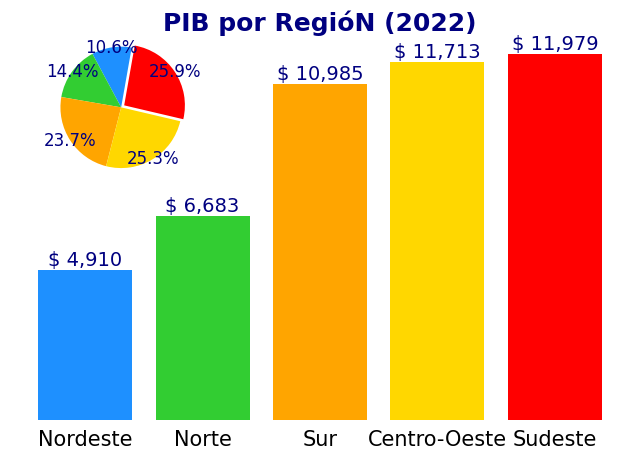

In [ ]:
##3#   GRAFICA DE BARRAS CON GRAFICA PIE   ####

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Datos de la gráfica de barras
# colores = ['#00b4d8','#adb5bd', '#dee2e6', '#90e0ef', '#0077b6']
colores = [ 'dodgerblue','limegreen', 'orange' , 'gold', 'red']

# labels = ['S-E', 'N-E', 'C-O', 'N', 'S']
bar_positions = np.arange(len(df_order[('Unidad','Unidad')]))
bar_heights = df_order[('PIB per cápita','USD')]

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(bar_positions, bar_heights, color=colores)
plt.box(False)

# Configuraciones de la gráfica de barras
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_order[('Unidad','Unidad')], fontsize=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'PIB por RegióN (2022)', color='navy', fontweight='bold', fontsize=18,pad=1)

# Mostrar etiquetas en las barras
for i, value in enumerate(bar_heights):
    ax.text(i, value, f'$ {value:,.0f}', ha='center', va='bottom', fontsize=14, color='navy')

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#GRafica pie:
explode = (0, 0, 0, 0, 0.06)  # Separar la primera porción (Sureste)
axins = inset_axes(ax, width="35%", height="35%", loc='upper left', borderpad=0.3)
axins.pie(df_order[('PIB per cápita','USD')], autopct='%1.1f%%', colors=colores, startangle=80,
          textprops={'fontsize': 12,'color':'navy'}, labels=None, pctdistance=1,explode=explode)
axins.axis('equal')


# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/pib_regiones_brasil.png')
plt.box(False)
plt.show()


###Ordenando el dataset ventas/años por regiones para grafica con geopandas:

In [ ]:
# Dividir cada valor por 1000 y redondear
df_1K = (df_ventas_año_region / 1000).round()
df_1K = df_1K.T # Transponer el DataFrame
df_1K.columns = df_1K.columns.astype(str) # Convertir los años a cadenas (strings)
df_1K['Region'] = df_1K.index # Agregar una nueva columna 'region' con los índices actuales
df_1K.reset_index(drop=True, inplace=True)# Resetear el índice
df_1K = df_1K[['Region', '2019', '2020', '2021', '2022']] # Reorganizar las columnas en el orden deseado
df_1K = df_1K.rename_axis(None, axis=1) # Eliminar el nombre del índice
df_1K.iloc[:, 1:] = df_1K.iloc[:, 1:].astype(int) # Convertir los valores a enteros

df_1K

<ipython-input-145-ca508c7622d3>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1K.iloc[:, 1:] = df_1K.iloc[:, 1:].astype(int) # Convertir los valores a enteros


,Region,2019,2020,2021,2022
0,Sureste,523,649,871,980
1,Noreste,346,282,360,549
2,Centro-Oeste,67,91,125,98
3,Norte,72,107,70,99
4,Sur,44,61,110,99


###Ordenando filas siguiendo el orden que tiene dataset de Población:

In [ ]:
# df de población
# Ordenar filas:
order = ['Norte', 'Centro-Oeste', 'Noreste', 'Sureste', 'Sur']
df_ordered = df_1K.set_index('Region').loc[order].reset_index()
df_ordered

,Region,2019,2020,2021,2022
0,Norte,72,107,70,99
1,Centro-Oeste,67,91,125,98
2,Noreste,346,282,360,549
3,Sureste,523,649,871,980
4,Sur,44,61,110,99


###Creando column se siglas:

In [ ]:
# df de población
region_mapping = {
    'Norte': 'N',
    'Centro-Oeste': 'C-O',
    'Noreste': 'N-E',
    'Sureste': 'S-E',
    'Sur': 'S'
}

df_ordered['Region_siglas'] = df_ordered['Region'].replace(region_mapping)
df_ordered

,Region,2019,2020,2021,2022,Region_siglas
0,Norte,72,107,70,99,N
1,Centro-Oeste,67,91,125,98,C-O
2,Noreste,346,282,360,549,N-E
3,Sureste,523,649,871,980,S-E
4,Sur,44,61,110,99,S


### Visualizar Mapa de Brasil con los datos anteriores:

<ipython-input-148-341f74d4730d>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-148-341f74d4730d>:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.19, .29, text_box_año, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=.7, boxstyle='round', pad=0.5, linewidth=1, color='blue'),fontweight='bold', color='white', zorder=150)
<ipython-input-148-341f74d4730d>:73: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.19, .22, text_box_valor, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='c

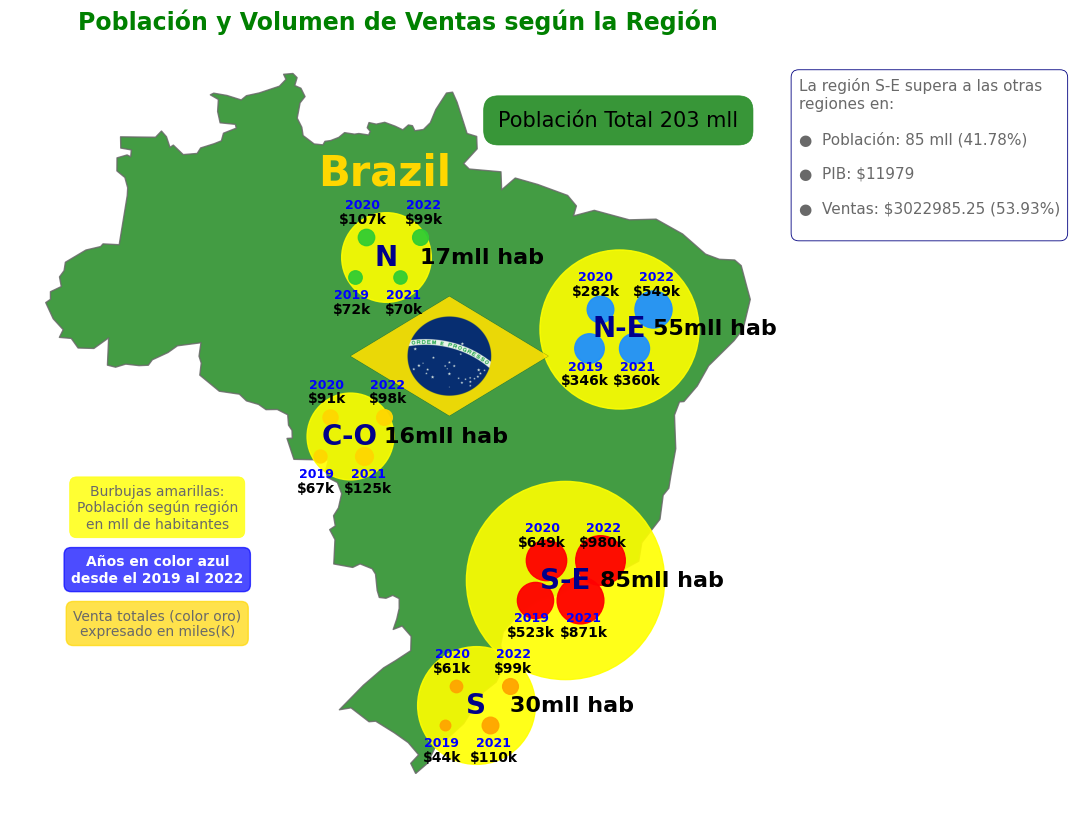

La región S-E supera a las otras regiones en:

●  Población: 85 mll (41.78%)

●  PIB: $11979

●  Ventas: $3022985.25 (53.93%)



In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

regiones = ['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']
regiones = ['N', 'C-O', 'N-E', 'S-E', 'S']
poblaciones = [17355778,16289538, 54657621, 84840113, 29937706, ]
# colores = ['#adb5bd', '#90e0ef', '#00b4d8', '#0077b6', '#dee2e6']
colores = [ 'limegreen' ,'gold', 'dodgerblue','red', 'orange']

df_population = pd.DataFrame({'Region': regiones, 'Population': poblaciones})

df_population.to_csv('/content/drive/MyDrive/Colab Notebooks/poblacion_por_region_brasil_2022.csv', index=False)
df_population['Population_10k']=round(df_population['Population']/10000,0)
df_population['Population_mll']=round(df_population['Population']/1000000,0)

# Cargar el archivo de límites políticos de Brasil proporcionado por GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar Brasil
brasil = world[world['name'] == 'Brazil']

data=df_ordered
pop_df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([-55, -57, -42, -45, -50], [-5, -15, -9, -23, -30]))
pop_censo_df = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy([-55, -57, -42, -45, -50], [-5, -15, -9, -23, -30]))

# Graficar el mapa de burbujas
fig, ax = plt.subplots(figsize=(10, 10))

brasil.plot(ax=ax, color='forestgreen', edgecolor='dimgray',alpha=.85)
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/bandera_brasil-removebg-preview.png")
ax.imshow(img, extent=[-58, -45, -14.5, -6.5], alpha=.9, aspect='auto', zorder=2)

# Tamaño de burbujas proporcional a la población en cada año
sizes_2019 = pop_df['2019']
sizes_2020 = pop_df['2020']
sizes_2021 = pop_df['2021']
sizes_2022 = pop_df['2022']

# Burbujas, posición y etiquetas:
pop_df['geometry_2019'] = pop_df['geometry'].translate(-1.7, -1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2019'].x, pop_df['geometry_2019'].y, sizes_2019, pop_df['Region_siglas'], colores,pop_df['2019']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=70)
    ax.text(x-.2, y-1, '2019', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x-.2, y-1.8, f'${valor}k', fontsize=10, ha='center', va='center',color='black',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2020'] = pop_df['geometry'].translate(-1.1, 1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2020'].x, pop_df['geometry_2020'].y, sizes_2020, pop_df['Region_siglas'], colores,pop_df['2020']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=80)
    ax.text(x-.2, y+1.8, '2020', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x-.2, y+1, f'${valor}k', fontsize=10, ha='center', va='center',color='black',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2021'] = pop_df['geometry'].translate(.8, -1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2021'].x, pop_df['geometry_2021'].y, sizes_2021, pop_df['Region_siglas'], colores,pop_df['2021']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=90)
    ax.text(x+.2, y-1, '2021', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x+.2, y-1.8, f'${valor}k', fontsize=10, ha='center', va='center',color='black',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2022'] = pop_df['geometry'].translate(1.9, 1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2022'].x, pop_df['geometry_2022'].y, sizes_2022, pop_df['Region_siglas'], colores,pop_df['2022']):
    ax.scatter(x, y, c=color,marker='o', s=size*1.3 , alpha=.95,zorder=100)
    ax.text(x+.2, y+1.8, '2022', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x+.2, y+1, f'${valor}k', fontsize=10, ha='center', va='center',color='black',fontweight='bold',zorder=130)

#textos explicativos
text_box_año = 'Años en color azul\ndesde el 2019 al 2022'
ax.text(0.19, .29, text_box_año, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=.7, boxstyle='round', pad=0.5, linewidth=1, color='blue'),fontweight='bold', color='white', zorder=150)
text_box_valor = 'Venta totales (color oro)\nexpresado en miles(K)'
ax.text(0.19, .22, text_box_valor, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=.7, boxstyle='round', pad=0.5, linewidth=1, color='gold'), color='dimgray', zorder=150)

# Texto para las burbujas de poblacion
poblacion_brazil=(df_population.Population.sum()/1000000).round()
text_population_title = f'Población Total {poblacion_brazil:0.0f} mll'
text_population = 'Burbujas amarillas:\nPoblación según región\nen mll de habitantes'
ax.text(.63, .88, text_population_title, transform=ax.transAxes, fontsize=15, verticalalignment='bottom',horizontalalignment='left', bbox=dict(facecolor='red', alpha=0.9, boxstyle='round', pad=0.7, linewidth=0.5,color='forestgreen'), color='black', zorder=150)
ax.text(.19, .36, text_population, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round', pad=0.5, linewidth=0.5, color='yellow'), color='dimgray', zorder=150)

# Etiquetas de región
for x, y, label,sizes_censo, habitantes_mll in zip(pop_df['geometry'].x, pop_df['geometry'].y, pop_df['Region_siglas'],pop_censo_df['Population_10k'],pop_censo_df['Population_mll']):
    ax.text(x, y, label, fontsize=20, ha='center', va='center',color='darkblue', fontweight='bold',zorder=110)
    #Pablación:
    ax.text(x+1.9, y, f'{int(habitantes_mll)}mll hab', fontsize=16, ha='left', va='center',color='black', fontweight='bold',zorder=110)
    #Burbuja de population:
    ax.scatter(x, y, c='yellow', s=sizes_censo*2.4, alpha=0.9)

# Añadir la imagen del gráfico de torta
img_pie_poblacion = '/content/drive/MyDrive/Colab Notebooks/distribucion_poblacion_brasil.png'
img_ventas_total = '/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil_insertGraf.png'
img_PIB = '/content/drive/MyDrive/Colab Notebooks/pib_regiones_brasil.png'

# Añadir la imagen pie (% de poblacion segun region)
# img_pie = OffsetImage(plt.imread(img_pie_poblacion), zoom=.6)
# ab = AnnotationBbox(img_pie, (1.2,0.53), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0,zorder=-1000)
# ax.add_artist(ab)

# Añadir la imagen del gráfico de barras (ventas total)
# img_ventas = OffsetImage(plt.imread(img_ventas_total), zoom=.41)
# ab_ventas = AnnotationBbox(img_ventas, (1.2, 0.54), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-500)
# ax.add_artist(ab_ventas)

# Añadir la imagen del gráfico PIE (PIB)
# img_ventas = OffsetImage(plt.imread(img_PIB), zoom=.41)
# ab_ventas = AnnotationBbox(img_ventas, (1.2, 0.23), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-300)
# ax.add_artist(ab_ventas)

brasil_name='Brazil'
title='Población y Volumen de Ventas según la Región'
plt.title(title, color='green', fontsize='17',fontweight='bold')
plt.text(0.5, 0.745, brasil_name, color='gold', fontsize='30', fontweight='bold', ha='center', va='center', transform=plt.gcf().transFigure)



# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#Texto insigt
pib_SE=df_pib_usd_region['PIB per cápita'].max()[0] #obtener el PIB de S-E
porc_population_SE=df_population['Population'].max()/df_population['Population'].sum() #obtener % de la poblacion de S-E
porc_ventas_SE=df_total_sales['Total_ventas'].max()/df_total_sales['Total_ventas'].sum() #obtener % de la ventas de S-E
insight = f'''La región S-E supera a las otras regiones en:\n
●  Población: {poblaciones[3]/1000000:.0f} mll ({porc_population_SE:.2%})

●  PIB: ${pib_SE}

●  Ventas: ${df_total_sales['Total_ventas'].max()} ({porc_ventas_SE:.2%})
'''
ax.text(-32,5, insight, ha='left', va='top', fontsize=11, bbox=dict(facecolor='white', edgecolor='navy', pad=.5, boxstyle='round', linewidth=.6), color='dimgray', wrap=True)
ax.text(-32,-20, '--------------------------------------------------', ha='left', va='top', fontsize=11, color='white', wrap=True)

plt.show()
print(insight)

# Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

Crea una función pregunta_4(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_modo_envio y guarda unicamente las columnas 'modo_envio' y 'segmento_cliente'.

In [ ]:
def pregunta_4():
  global df_ventas, df_ventas_limpio, df_ventas_año,df_modo_envio
  df_modo_envio= (df_ventas_limpio[['modo_envio','segmento_cliente']]).copy()
  return df_modo_envio
pregunta_4()

,modo_envio,segmento_cliente
0,Económico,B2C
1,Económico,B2C
2,Económico,B2B
3,Entrega estándar,B2C
4,Entrega estándar,B2C
...,...,...
7205,Entrega estándar,B2C
7206,Entrega estándar,B2B
7207,Entrega estándar,B2B
7208,Económico,B2C


Por último, genera una tabla cruzada con el método pd.crosstab:

In [ ]:
df_modo_envio=pd.crosstab(index = df_modo_envio.modo_envio, columns = df_modo_envio.segmento_cliente).sort_values("B2B")
df_modo_envio

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,171,231
Envío rápido,543,542
Económico,707,755
Entrega estándar,2048,2213


In [ ]:
df_modo_envio.loc['Entrega estándar'].sum()

4261

In [ ]:
df_modo_envio.loc[['Envío rápido','Económico','24 horas']].sum().sum()

2949

In [ ]:
df_modo_envio.sum().sum()

7210

###2. Visualización:

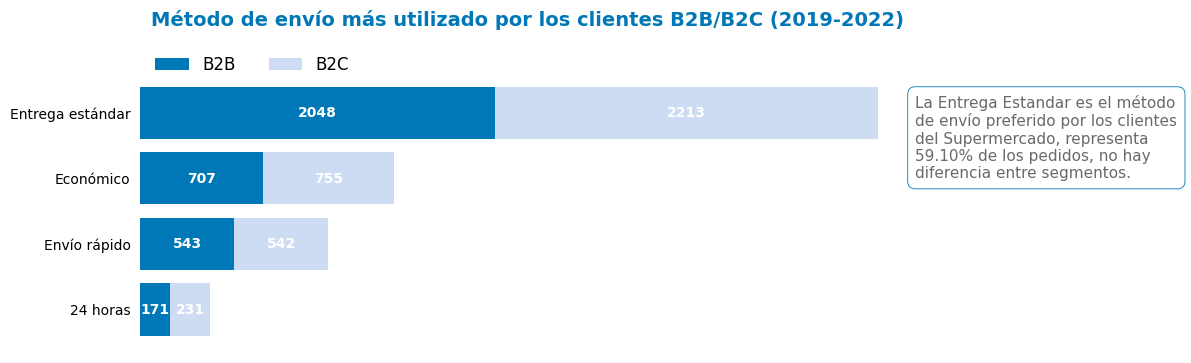

La Entrega Estandar es el método de envío preferido por los clientes del Supermercado, representa 59.10% de los pedidos, no hay diferencia entre segmentos.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 4))

colores = ['#0077b6', '#CDDBF3']
ejeX = df_modo_envio.index
eje1Y = df_modo_envio['B2B']
eje2Y = df_modo_envio['B2C']

# Etiquetas para la leyenda
etiqueta_B2B = 'B2B'
etiqueta_B2C = 'B2C'

# Barras para B2B
barra_B2B = ax.barh(ejeX, eje1Y, color=colores[0], label=etiqueta_B2B)

# Barras para B2C
barra_B2C = ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1], label=etiqueta_B2C)

for container in [barra_B2B, barra_B2C]:
    ax.bar_label(container, label_type='center', fmt='%i', color='white', fontweight='bold')

# Agregar leyenda
ax.legend(loc='center left', bbox_to_anchor=(0, .9), frameon=False, fontsize=12, ncol=2)

plt.title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)', fontsize=14, color='#0077b6', fontweight='bold')

plt.box(False)
plt.xlabel('')
plt.xticks([])

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)


#calcular % de entrega estandar:
porc_entrega_estandar= df_modo_envio.loc['Entrega estándar'].sum()/df_modo_envio.sum().sum()
#insight
insight=f'''La Entrega Estandar es el método de envío preferido por los clientes del Supermercado, representa {porc_entrega_estandar:.2%} de los pedidos, no hay diferencia entre segmentos.'''
ax.text(df_modo_envio.loc['Entrega estándar'].sum()*1.05,len(ejeX)*.82, insight, ha='left', va='top', fontsize=11, bbox=dict(facecolor='white', edgecolor='#0077b6', pad=.5, boxstyle='round', linewidth=.6), color='dimgray', wrap=True)
ax.text(df_modo_envio.loc['Entrega estándar'].sum()*1.08,len(ejeX)*.5, '--------------------------------------------------', ha='left', va='top', color='white')


# Ampliar ylim
ax.set_ylim(-0.5, len(ejeX) + 0.2)
plt.show()
print(insight)

# Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?
Crea una función pregunta_5(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en nuevo dataframe df_ventas_sp y guarda sólo las columnas fecha_pedido y total_venta sólo de los registros con valor São Paulo en columna estado. La columna fecha_pedido debe ser el nuevo índice.

In [ ]:
df_ventas_limpio.head()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08


In [ ]:
def pregunta_5():
  global df_ventas, df_ventas_limpio, df_ventas_año,df_modo_envio,df_ventas_sp
  df_ventas_sp=df_ventas_limpio.copy() # Haciendo la copia
  df_ventas_sp = df_ventas_sp[df_ventas_sp['estado'] == 'São Paulo'] # selección sólo de San Pablo
  df_ventas_sp= (df_ventas_sp[['fecha_pedido','total_venta']]) # establecer estas columnas
  df_ventas_sp.set_index('fecha_pedido', inplace=True) #nuevo index
  return df_ventas_sp
df_ventas_sp= pregunta_5()
df_ventas_sp.head(3)

,total_venta
fecha_pedido,
2021-11-09,890.66
2021-11-09,2488.59
2019-11-12,2263.98


Ahora, con los datos de df_ventas_sp, vamos a agrupar las ventas por trimestre, puedes generar esto de la siguiente forma:

In [ ]:
df_ventas_sp=df_ventas_sp.resample('Q').agg('sum')
df_ventas_sp.head(3)

,total_venta
fecha_pedido,
2019-03-31,27377.18
2019-06-30,33951.90
2019-09-30,90208.89


Ahora, puedes también redondear el valor de la columna total_venta para dejarlo en escala de miles.

In [ ]:
df_ventas_sp=round(df_ventas_sp/1000,2)
df_ventas_sp.head(4)

,total_venta
fecha_pedido,
2019-03-31,27.38
2019-06-30,33.95
2019-09-30,90.21
2019-12-31,124.09


###Finalmente, reseta el indice y guarda el resultado en df_ventas_sp.

In [ ]:
df_ventas_sp=df_ventas_sp.reset_index()
df_ventas_sp.head(4)

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09


In [ ]:
df=df_ventas_sp.copy()
df['es_diciembre'] = df['fecha_pedido'].dt.month == 12
df['año']= df.fecha_pedido.dt.year
df['mes']= df.fecha_pedido.dt.month
df_visulizar_ventas_x_trimestre_año=df.copy()
df_visulizar_ventas_x_trimestre_año

,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,27.38,False,2019,3
1,2019-06-30,33.95,False,2019,6
2,2019-09-30,90.21,False,2019,9
3,2019-12-31,124.09,True,2019,12
4,2020-03-31,26.73,False,2020,3
5,2020-06-30,66.15,False,2020,6
6,2020-09-30,109.18,False,2020,9
7,2020-12-31,180.42,True,2020,12
8,2021-03-31,35.74,False,2021,3
9,2021-06-30,95.44,False,2021,6


###2. Visualización:

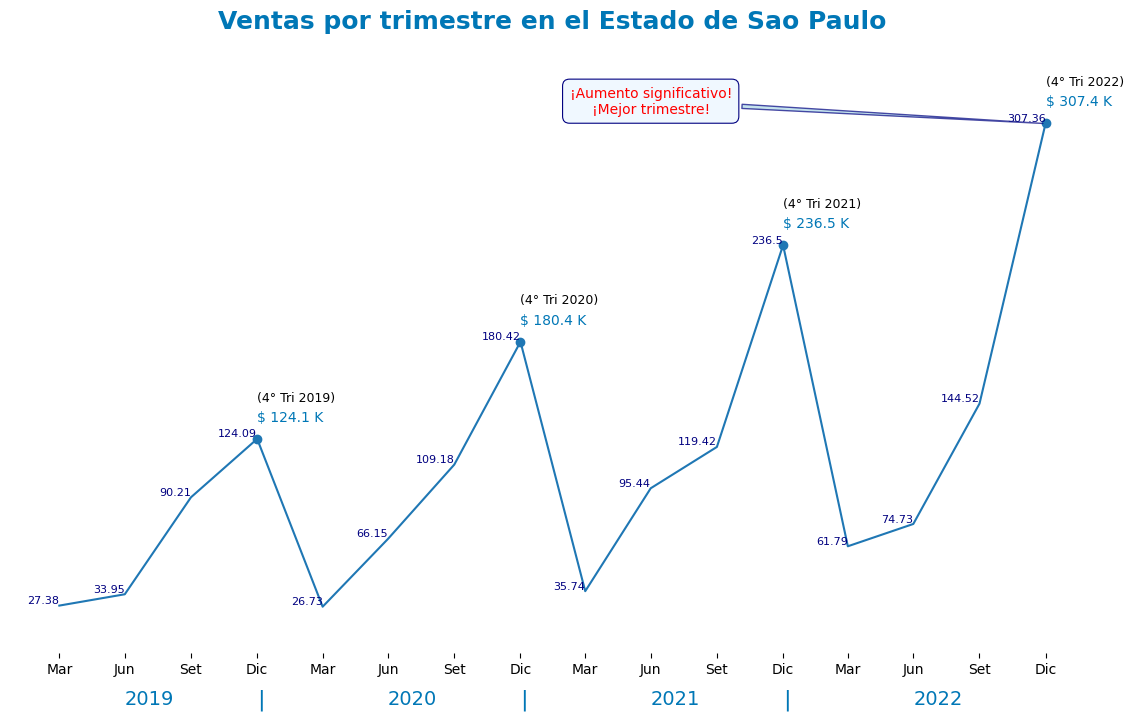

In [ ]:
df_visual=df_visulizar_ventas_x_trimestre_año.copy()
fig, ax = plt.subplots(figsize=(14,8))

# Iterar sobre los datos para agregar etiquetas
for i, row in df_visual.iterrows():
    ax.text(row['fecha_pedido'], row['total_venta'], row['total_venta'], ha='right', va='bottom', fontsize=8, rotation=0, color='navy')

ax.plot(df_visual['fecha_pedido'],df_visual['total_venta'],marker="o",markevery=df['es_diciembre'])
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
x_labels_años=[2019,2020,2021,2022]*4
x_labels_año = df['año']
ax.set_xticks(df_visual.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

### texto en puntos del cuarto trimestre
for i in range(3, len(df["total_venta"]), 4):
  posicionX=ax.get_xticks()[i]
  posicionY=df["total_venta"][i]
  color_valor = '#0077b6'
  color_tri = 'black'
  ax.text(posicionX, posicionY+10, f'$ {posicionY:0.1f} K',fontsize=10,color=color_valor)
  ax.text(posicionX, posicionY+22, f'(4° Tri {x_labels_año[i]})',fontsize=9,color=color_tri)
  # ax.text(posicionX*1.006, posicionY+11, f'(4° Tri {x_labels_año[i]})',fontsize=9,color=color_tri)

# Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df_visual), 4):
    ax.text(df_visual['fecha_pedido'].iloc[i+1], -30,str(df['año'].iloc[i]), ha='left',fontsize=14,color='#0077b6')
    if i<12:
      ax.text(df_visual['fecha_pedido'].iloc[i+3], -30,'|', ha='left',fontsize=16,color='#0077b6')

plt.title('Ventas por trimestre en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')


plt.box([])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
insight = "¡Aumento significativo!\n¡Mejor trimestre!"
bbox_props = dict(boxstyle='round,pad=0.5',  fc='aliceblue', ec='navy', lw=.8)
plt.annotate(insight, xy=(df_visual['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 320),
            ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
            arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# # Agrega una anotación resaltada con annotate
# insight = "¡Aumento significativo!\n¡Mejor trimestre!"
# bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='navy', lw=.8)
# plt.annotate(insight, xy=(df['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
#             ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
#             arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

ax.set_ylim(bottom=0, top=df_visual['total_venta'].max() + 50)  # Ajusta el rango superior según sea necesario

plt.show()

# Análisis de productos top 5 en ventas en San Pablo y visualización
# Prediccion de Ventas año 2023

### obteniendo df de ventas de San Pablo

In [ ]:
df_ventas_sp_large=df_ventas_limpio.copy() # Haciendo la copia
df_ventas_sp_large = df_ventas_sp_large[df_ventas_sp_large['estado'] == 'São Paulo'] # selección sólo de San Pablo
# Suponiendo que 'total_venta' es la columna que contiene las ventas
df_ventas_sp_large['año']= df_ventas_sp_large.fecha_pedido.dt.year
df_ventas_sp_large['mes']= df_ventas_sp_large.fecha_pedido.dt.month
df_ventas_sp_large.set_index('fecha_pedido', inplace=True) #nuevo index
df_ventas_sp_large[df_ventas_sp_large['tipo_producto']=='Laptops']

<ipython-input-162-fb0acc8b5e11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_sp_large['año']= df_ventas_sp_large.fecha_pedido.dt.year
<ipython-input-162-fb0acc8b5e11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_sp_large['mes']= df_ventas_sp_large.fecha_pedido.dt.month


,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia,año,mes
fecha_pedido,,,,,,,,,,,,,,,,,,
2019-09-22,2019-09-24,Económico,Luiz Miguel Peixoto,B2C,Taubaté,São Paulo,Sureste,Electrónicos,Laptops,1642.17,2039.97,0.0,2039.97,3,6119.91,1193.40,2019,9
2019-07-07,2019-07-09,Envío rápido,Enzo Gabriel Barbosa,B2C,São Paulo,São Paulo,Sureste,Electrónicos,Laptops,1606.47,2115.52,0.1,1903.97,1,1903.97,297.50,2019,7
2022-10-23,2022-10-25,Envío rápido,Maria Clara Gonçalves,B2B,São Paulo,São Paulo,Sureste,Electrónicos,Laptops,7853.98,10577.74,0.1,9519.97,4,38079.88,6663.96,2022,10
2021-01-05,2021-01-10,Entrega estándar,Cauê Martins,B2B,Santo André,São Paulo,Sureste,Electrónicos,Laptops,764.97,906.63,0.1,815.97,4,3263.88,204.00,2021,1
2020-09-13,2020-09-18,Entrega estándar,Benício da Mota,B2C,São Paulo,São Paulo,Sureste,Electrónicos,Laptops,764.98,906.64,0.1,815.98,2,1631.96,102.00,2020,9
2020-09-15,2020-09-19,Entrega estándar,Davi Luiz da Paz,B2C,São Paulo,São Paulo,Sureste,Electrónicos,Laptops,1215.48,1662.20,0.1,1495.98,2,2991.96,561.00,2020,9
2022-11-18,2022-11-23,Entrega estándar,Davi Ramos,B2C,Campinas,São Paulo,Sureste,Electrónicos,Laptops,9043.97,11899.97,0.0,11899.97,3,35699.91,8568.00,2022,11
2020-12-11,2020-12-11,24 horas,Benjamin Moura,B2B,São Paulo,São Paulo,Sureste,Electrónicos,Laptops,1147.48,1511.09,0.1,1359.98,2,2719.96,425.00,2020,12
2020-11-22,2020-11-27,Económico,Ana Cardoso,B2B,Jandira,São Paulo,Sureste,Electrónicos,Laptops,1215.47,1662.19,0.1,1495.97,1,1495.97,280.50,2020,11


In [ ]:
df_ventas_sp_large['tipo_producto'].unique()

array(['Camisetas', 'Jeans', 'Papel higiénico', 'Cámaras digitales',
       'Cepillos de baño', 'Lámparas LED', 'Vestidos', 'Smartphones',
       'Toallitas desinfectantes', 'Bolsas de basura',
       'Limpiador de inodoros', 'Detergente para platos',
       'Limpiacristales', 'Zapatillas', 'Detergente para ropas',
       'Laptops', 'Ambientador en spray'], dtype=object)

In [ ]:
len(df_ventas_sp_large['tipo_producto'].unique())

17

### CREANDO DF POR TIPO DE PRODUCTO SEGÚN TRIMESTRE Y AÑO=2019 SELECCIONANDO LOS TRES DE MAYOR VOLUMEN DE VENTAS:

In [ ]:
#####################   CREANDO DF POR TIPO DE PRODUCTO SEGÚN TRIMESTRE Y AÑO=2019 SELECCIONANDO LOS TRES DE MAYOR VOLUMEN DE VENTAS:   #####################
lista_group_tipo_producto_trimestre_1_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([1, 2, 3])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_2_2019= df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([4, 5, 6])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_3_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([7, 8, 9])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_4_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([10, 11, 12])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

df_tipo_producto_trimestres_2019 = pd.DataFrame({
    'total_venta_trimestre_1_2019': lista_group_tipo_producto_trimestre_1_2019,
    'total_venta_trimestre_2_2019': lista_group_tipo_producto_trimestre_2_2019,
    'total_venta_trimestre_3_2019': lista_group_tipo_producto_trimestre_3_2019,
    'total_venta_trimestre_4_2019': lista_group_tipo_producto_trimestre_4_2019
})
df_tipo_producto_trimestres_2019.dropna(inplace=True) #Eliminar nan

# Calcular la suma por filas
df_tipo_producto_trimestres_2019['total_venta_suma'] = df_tipo_producto_trimestres_2019.sum(axis=1)
top_3_tipo_producto_trimestres_2019 = df_tipo_producto_trimestres_2019.nlargest(3, 'total_venta_suma') # Seleccionar las tres mayores
top_3_tipo_producto_trimestres_2019 = top_3_tipo_producto_trimestres_2019.drop('total_venta_suma', axis=1) # Eliminar la columna temporal de suma
top_3_tipo_producto_trimestres_2019


,total_venta_trimestre_1_2019,total_venta_trimestre_2_2019,total_venta_trimestre_3_2019,total_venta_trimestre_4_2019
tipo_producto,,,,
Jeans,9998.02,2488.61,21142.68,24408.41
Cámaras digitales,4596.28,6924.12,16666.58,19636.33
Papel higiénico,1276.57,1319.67,10333.70,24426.25


In [ ]:
lista_group_tipo_producto_trimestre_1_2019

tipo_producto
Ambientador en spray         842.24
Bolsas de basura            1634.46
Cepillos de baño             105.80
Cámaras digitales           4596.28
Jeans                       9998.02
Limpiacristales               59.44
Limpiador de inodoros        274.05
Lámparas LED                3132.72
Papel higiénico             1276.57
Smartphones                  106.08
Toallitas desinfectantes      40.08
Vestidos                    1283.40
Zapatillas                  4028.04
Name: total_venta, dtype: float64

### CREANDO DF POR TIPO DE PRODUCTO SEGÚN TRIMESTRE Y AÑO 2019 al 2022 SELECCIONANDO LOS TRES DE MAYOR VOLUMEN DE VENTAS:

In [ ]:
# Crear DataFrame por tipo de producto según trimestre y año
def create_df_for_year(year):
    lista_group_tipo_producto_trimestre_1 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([1, 2, 3])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_2 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([4, 5, 6])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_3 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([7, 8, 9])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_4 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([10, 11, 12])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    df_tipo_producto_trimestres = pd.DataFrame({
        f'total_venta_trimestre_1_{year}': lista_group_tipo_producto_trimestre_1,
        f'total_venta_trimestre_2_{year}': lista_group_tipo_producto_trimestre_2,
        f'total_venta_trimestre_3_{year}': lista_group_tipo_producto_trimestre_3,
        f'total_venta_trimestre_4_{year}': lista_group_tipo_producto_trimestre_4
    })

    # df_tipo_producto_trimestres.dropna(inplace=True)  # Eliminar nan
    df_tipo_producto_trimestres = df_tipo_producto_trimestres.fillna(0)
    # Calcular la suma por filas
    df_tipo_producto_trimestres[f'total_venta_suma_{year}'] = df_tipo_producto_trimestres.sum(axis=1)

    return df_tipo_producto_trimestres

# Crear DataFrames para los años 2019, 2020, 2021 y 2022
df_tipo_producto_trimestres_2019 = create_df_for_year(2019)
df_tipo_producto_trimestres_2020 = create_df_for_year(2020)
df_tipo_producto_trimestres_2021 = create_df_for_year(2021)
df_tipo_producto_trimestres_2022 = create_df_for_year(2022)

# Seleccionar las tres mayores
top=17
top_tipo_producto_trimestres_2019 = df_tipo_producto_trimestres_2019.nlargest(top, f'total_venta_suma_2019').drop(f'total_venta_suma_2019', axis=1)
top_tipo_producto_trimestres_2020 = df_tipo_producto_trimestres_2020.nlargest(top, f'total_venta_suma_2020').drop(f'total_venta_suma_2020', axis=1)
top_tipo_producto_trimestres_2021 = df_tipo_producto_trimestres_2021.nlargest(top, f'total_venta_suma_2021').drop(f'total_venta_suma_2021', axis=1)
top_tipo_producto_trimestres_2022 = df_tipo_producto_trimestres_2022.nlargest(top, f'total_venta_suma_2022').drop(f'total_venta_suma_2022', axis=1)


### Creando df ventas por año según tipo de producto

In [ ]:
# Crear DataFrame por tipo de producto y año
lista_group_tipo_producto_ventas_2019 = df_ventas_sp_large[(df_ventas_sp_large['año'] == 2019)]\
        .groupby(['tipo_producto'])['total_venta'].sum()
lista_group_tipo_producto_ventas_2020 = df_ventas_sp_large[(df_ventas_sp_large['año'] == 2020)]\
        .groupby(['tipo_producto'])['total_venta'].sum()
lista_group_tipo_producto_ventas_2021 = df_ventas_sp_large[(df_ventas_sp_large['año'] == 2021)]\
        .groupby(['tipo_producto'])['total_venta'].sum()
lista_group_tipo_producto_ventas_2022 = df_ventas_sp_large[(df_ventas_sp_large['año'] == 2022)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

dict_ventas={2019: lista_group_tipo_producto_ventas_2019,
             2020: lista_group_tipo_producto_ventas_2020,
             2021: lista_group_tipo_producto_ventas_2021,
             2022: lista_group_tipo_producto_ventas_2022
             }
df_group_tipo_producto_ventas_x_ano = pd.DataFrame(dict_ventas)
df_group_tipo_producto_ventas_x_ano

,2019,2020,2021,2022
tipo_producto,,,,
Ambientador en spray,11131.27,17648.01,20976.14,41209.41
Bolsas de basura,8282.53,13559.07,21272.74,18440.68
Camisetas,723.99,30133.39,9855.22,14884.35
Cepillos de baño,301.50,644.26,805.98,871.35
Cámaras digitales,47823.31,62932.87,49174.25,106318.16
Detergente para platos,14854.02,1560.71,1769.63,8921.19
Detergente para ropas,47354.68,29346.89,19168.24,49166.32
Jeans,58037.72,46896.32,73932.29,89945.55
Laptops,9893.85,20229.61,66163.65,81939.64


In [ ]:
#agregar ventas totales:
df_group_tipo_producto_ventas_x_ano['total_venta'] = df_group_tipo_producto_ventas_x_ano.sum(axis=1) #AGREGAR COLUMNA TOTAL VENTAS
df_group_tipo_producto_ventas_x_ano

,2019,2020,2021,2022,total_venta
tipo_producto,,,,,
Ambientador en spray,11131.27,17648.01,20976.14,41209.41,90964.83
Bolsas de basura,8282.53,13559.07,21272.74,18440.68,61555.02
Camisetas,723.99,30133.39,9855.22,14884.35,55596.95
Cepillos de baño,301.50,644.26,805.98,871.35,2623.09
Cámaras digitales,47823.31,62932.87,49174.25,106318.16,266248.59
Detergente para platos,14854.02,1560.71,1769.63,8921.19,27105.55
Detergente para ropas,47354.68,29346.89,19168.24,49166.32,145036.13
Jeans,58037.72,46896.32,73932.29,89945.55,268811.88
Laptops,9893.85,20229.61,66163.65,81939.64,178226.75


In [ ]:
### agrupar por ventas totales desde el 2019 al 2020:
top=5
df_group_tipo_producto_ventas_2019_x_ano_top5 = df_group_tipo_producto_ventas_x_ano.nlargest(top, 'total_venta')
df_group_tipo_producto_ventas_2019_x_ano_top5.drop('total_venta',axis=1,inplace=True) #eliminar total ventas

# columnas_años = df_group_tipo_producto_ventas_2019_x_ano_top5.columns[:4]

# Convertir los nombres de las columnas a formato datetime

# df_group_tipo_producto_ventas_2019_x_ano_top5.columns = pd.to_datetime(columnas_años, format='%Y')

df_group_tipo_producto_ventas_2019_x_ano_top5

,2019,2020,2021,2022
tipo_producto,,,,
Jeans,58037.72,46896.32,73932.29,89945.55
Cámaras digitales,47823.31,62932.87,49174.25,106318.16
Lámparas LED,10027.44,45585.12,92739.28,46280.22
Laptops,9893.85,20229.61,66163.65,81939.64
Papel higiénico,37356.19,32754.89,40289.10,38434.35


In [ ]:
### Transpuesta
df_group_tipo_producto_ventas_2019_x_ano_top5_T=df_group_tipo_producto_ventas_2019_x_ano_top5.T
df_group_tipo_producto_ventas_2019_x_ano_top5_T

tipo_producto,Jeans,Cámaras digitales,Lámparas LED,Laptops,Papel higiénico
2019,58037.72,47823.31,10027.44,9893.85,37356.19
2020,46896.32,62932.87,45585.12,20229.61,32754.89
2021,73932.29,49174.25,92739.28,66163.65,40289.10
2022,89945.55,106318.16,46280.22,81939.64,38434.35


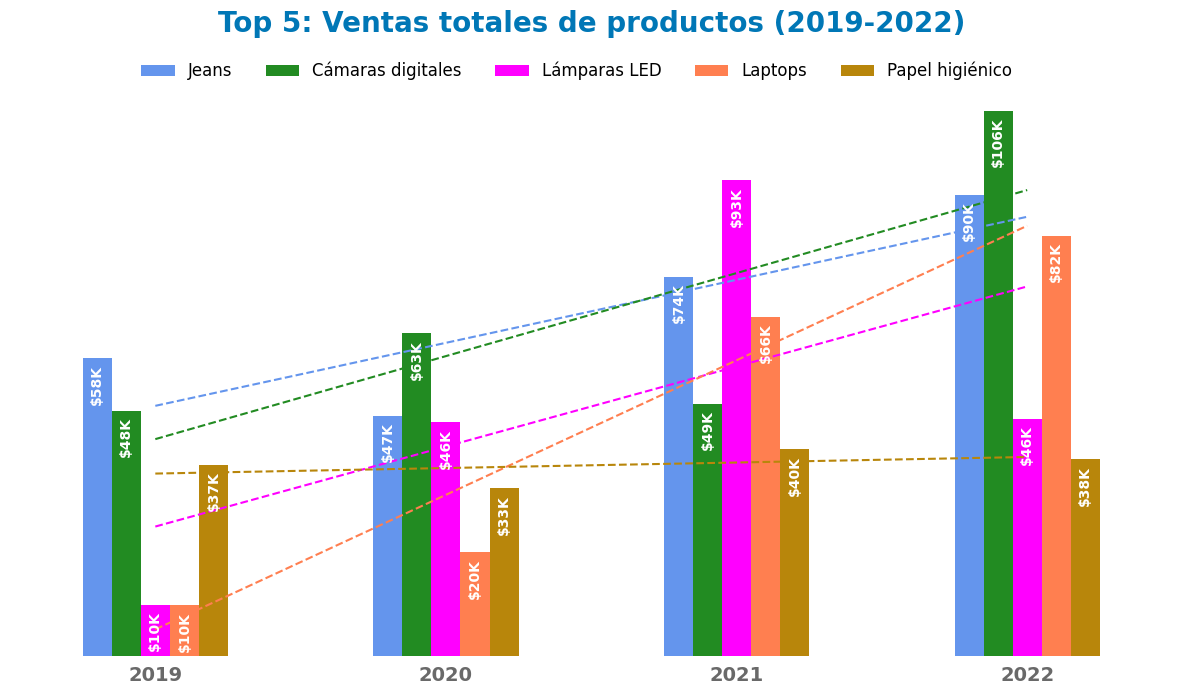

In [ ]:
df=df_group_tipo_producto_ventas_2019_x_ano_top5_T

# palette1=['orange','brown','magenta','forestgreen','cornflowerblue'][::-1]
palette1=['darkgoldenrod','coral','magenta','forestgreen','cornflowerblue'][::-1]

ax=df.plot(kind='bar', stacked=False, color=palette1,figsize=(15, 8))

# Configuraciones adicionales
plt.title('Ventas por tipo de producto y año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.xticks(rotation=0,color='dimgray', fontsize=14,fontweight='bold')
plt.title('Top 5: Ventas totales de productos (2019-2022)', fontsize=20, color='#0077b6', fontweight='bold')

#legend
legend_x = 0.1 # Ajusta la coordenada x de la leyenda
legend_y = .95# Ajusta la coordenada y de la leyenda
plt.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=5)

plt.box(False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

# Etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height()/1000:,.0f}K', ((p.get_x() + p.get_width() / 2.), p.get_height()-4e3),
                ha='center', va='top', xytext=(0, 10), textcoords='offset points', fontsize=10,rotation=90,color='white',fontweight='bold')

# Agregar línea de tendencia
# for col in df.columns:
#     trend_line = np.polyfit(np.arange(len(df)), df[col], 1)
#     ax.plot(np.arange(len(df)), np.polyval(trend_line, np.arange(len(df))), label=f'Tendencia {col}', linestyle='dashed')

for col, color in zip(df.columns, palette1):
    trend_line = np.polyfit(np.arange(len(df)), df[col], 1)
    ax.plot(np.arange(len(df)), np.polyval(trend_line, np.arange(len(df))), label=f'Tendencia {col}', linestyle='dashed', color=color)


# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.ylim(0,12e4)
plt.show()

In [ ]:
# TOP 3 EN PRODUCTOS:
year=2019
top_3_tipo_producto_trimestres_2019[f'total_venta_suma_{year}'] = top_3_tipo_producto_trimestres_2019.sum(axis=1)
top_3_tipo_producto_trimestres_2019

,total_venta_trimestre_1_2019,total_venta_trimestre_2_2019,total_venta_trimestre_3_2019,total_venta_trimestre_4_2019,total_venta_suma_2019
tipo_producto,,,,,
Jeans,9998.02,2488.61,21142.68,24408.41,58037.72
Cámaras digitales,4596.28,6924.12,16666.58,19636.33,47823.31
Papel higiénico,1276.57,1319.67,10333.70,24426.25,37356.19


In [ ]:
### CONCATENAR LOS DF  top_tipo_producto_trimestres_2019 AL 2022
dataframes = [top_tipo_producto_trimestres_2019, top_tipo_producto_trimestres_2020, top_tipo_producto_trimestres_2021, top_tipo_producto_trimestres_2022]

df_tipo_producto_trimestres_total = pd.concat(dataframes, axis=1) # Concatenar DataFrames
df_tipo_producto_trimestres_total = df_tipo_producto_trimestres_total.loc[:,~df_tipo_producto_trimestres_total.columns.duplicated()] # Eliminar columnas duplicadas (si las hay)
# df_tipo_producto_trimestres_total.dropna(inplace=True) #eliminar nan
df_tipo_producto_trimestres_total = df_tipo_producto_trimestres_total.fillna(0)

df_tipo_producto_trimestres_total

,total_venta_trimestre_1_2019,total_venta_trimestre_2_2019,total_venta_trimestre_3_2019,total_venta_trimestre_4_2019,total_venta_trimestre_1_2020,total_venta_trimestre_2_2020,total_venta_trimestre_3_2020,total_venta_trimestre_4_2020,total_venta_trimestre_1_2021,total_venta_trimestre_2_2021,total_venta_trimestre_3_2021,total_venta_trimestre_4_2021,total_venta_trimestre_1_2022,total_venta_trimestre_2_2022,total_venta_trimestre_3_2022,total_venta_trimestre_4_2022
tipo_producto,,,,,,,,,,,,,,,,
Jeans,9998.02,2488.61,21142.68,24408.41,1304.24,3456.24,16065.75,26070.09,1110.60,27680.88,9327.89,35812.92,15231.51,11835.56,32708.57,30169.91
Cámaras digitales,4596.28,6924.12,16666.58,19636.33,6323.04,5484.74,17261.04,33864.05,5067.63,7306.51,11810.65,24989.46,8156.04,19405.50,28146.78,50609.84
Detergente para ropas,0.00,224.31,9757.81,37372.56,0.00,0.00,2141.79,27205.10,978.90,18189.34,0.00,0.00,12215.18,11842.72,0.00,25108.42
Papel higiénico,1276.57,1319.67,10333.70,24426.25,8377.51,2667.29,11337.43,10372.66,4598.99,7436.90,15254.63,12998.58,7411.05,7379.58,5792.90,17850.82
Detergente para platos,0.00,14174.89,440.84,238.29,113.44,1216.95,107.72,122.60,0.00,677.21,586.83,505.59,1181.76,1678.72,312.56,5748.15
Ambientador en spray,842.24,1988.58,3279.11,5021.34,691.65,7082.12,1935.10,7939.14,2248.05,3277.53,14086.07,1364.49,1692.63,812.83,13476.61,25227.34
Lámparas LED,3132.72,1100.96,3067.76,2726.00,4438.83,29797.43,5531.57,5817.29,6487.74,4387.11,22195.43,59669.00,4706.61,6332.37,24568.90,10672.34
Laptops,0.00,0.00,9893.85,0.00,0.00,9519.79,4623.92,6085.90,3263.88,0.00,3399.92,59499.85,0.00,0.00,8159.85,73779.79
Smartphones,106.08,339.92,5167.22,3217.67,1777.23,2074.37,20866.17,30107.76,1184.22,4945.67,14126.69,3876.56,2055.58,2028.93,10651.55,20616.24


In [ ]:
df_tipo_producto_trimestres_total['total_venta'] = df_tipo_producto_trimestres_total.sum(axis=1) #AGREGAR COLUMNA TOTAL VENTAS
df_tipo_producto_trimestres_total

,total_venta_trimestre_1_2019,total_venta_trimestre_2_2019,total_venta_trimestre_3_2019,total_venta_trimestre_4_2019,total_venta_trimestre_1_2020,total_venta_trimestre_2_2020,total_venta_trimestre_3_2020,total_venta_trimestre_4_2020,total_venta_trimestre_1_2021,total_venta_trimestre_2_2021,total_venta_trimestre_3_2021,total_venta_trimestre_4_2021,total_venta_trimestre_1_2022,total_venta_trimestre_2_2022,total_venta_trimestre_3_2022,total_venta_trimestre_4_2022,total_venta
tipo_producto,,,,,,,,,,,,,,,,,
Jeans,9998.02,2488.61,21142.68,24408.41,1304.24,3456.24,16065.75,26070.09,1110.60,27680.88,9327.89,35812.92,15231.51,11835.56,32708.57,30169.91,268811.88
Cámaras digitales,4596.28,6924.12,16666.58,19636.33,6323.04,5484.74,17261.04,33864.05,5067.63,7306.51,11810.65,24989.46,8156.04,19405.50,28146.78,50609.84,266248.59
Detergente para ropas,0.00,224.31,9757.81,37372.56,0.00,0.00,2141.79,27205.10,978.90,18189.34,0.00,0.00,12215.18,11842.72,0.00,25108.42,145036.13
Papel higiénico,1276.57,1319.67,10333.70,24426.25,8377.51,2667.29,11337.43,10372.66,4598.99,7436.90,15254.63,12998.58,7411.05,7379.58,5792.90,17850.82,148834.53
Detergente para platos,0.00,14174.89,440.84,238.29,113.44,1216.95,107.72,122.60,0.00,677.21,586.83,505.59,1181.76,1678.72,312.56,5748.15,27105.55
Ambientador en spray,842.24,1988.58,3279.11,5021.34,691.65,7082.12,1935.10,7939.14,2248.05,3277.53,14086.07,1364.49,1692.63,812.83,13476.61,25227.34,90964.83
Lámparas LED,3132.72,1100.96,3067.76,2726.00,4438.83,29797.43,5531.57,5817.29,6487.74,4387.11,22195.43,59669.00,4706.61,6332.37,24568.90,10672.34,194632.06
Laptops,0.00,0.00,9893.85,0.00,0.00,9519.79,4623.92,6085.90,3263.88,0.00,3399.92,59499.85,0.00,0.00,8159.85,73779.79,178226.75
Smartphones,106.08,339.92,5167.22,3217.67,1777.23,2074.37,20866.17,30107.76,1184.22,4945.67,14126.69,3876.56,2055.58,2028.93,10651.55,20616.24,123141.86


### DF TOP N

In [ ]:
########     DATAFRAME REPRESENTANDO EL TOP N DE PRODUCTOS EN SAN PABLO POR TRIMESTRE Y POR AÑO    ##########

top=5
df_top_tipo_producto_trimestres_2019_top5 = df_tipo_producto_trimestres_total.nlargest(top, 'total_venta')
df_top_tipo_producto_trimestres_2019_top5

,total_venta_trimestre_1_2019,total_venta_trimestre_2_2019,total_venta_trimestre_3_2019,total_venta_trimestre_4_2019,total_venta_trimestre_1_2020,total_venta_trimestre_2_2020,total_venta_trimestre_3_2020,total_venta_trimestre_4_2020,total_venta_trimestre_1_2021,total_venta_trimestre_2_2021,total_venta_trimestre_3_2021,total_venta_trimestre_4_2021,total_venta_trimestre_1_2022,total_venta_trimestre_2_2022,total_venta_trimestre_3_2022,total_venta_trimestre_4_2022,total_venta
tipo_producto,,,,,,,,,,,,,,,,,
Jeans,9998.02,2488.61,21142.68,24408.41,1304.24,3456.24,16065.75,26070.09,1110.60,27680.88,9327.89,35812.92,15231.51,11835.56,32708.57,30169.91,268811.88
Cámaras digitales,4596.28,6924.12,16666.58,19636.33,6323.04,5484.74,17261.04,33864.05,5067.63,7306.51,11810.65,24989.46,8156.04,19405.50,28146.78,50609.84,266248.59
Lámparas LED,3132.72,1100.96,3067.76,2726.00,4438.83,29797.43,5531.57,5817.29,6487.74,4387.11,22195.43,59669.00,4706.61,6332.37,24568.90,10672.34,194632.06
Laptops,0.00,0.00,9893.85,0.00,0.00,9519.79,4623.92,6085.90,3263.88,0.00,3399.92,59499.85,0.00,0.00,8159.85,73779.79,178226.75
Papel higiénico,1276.57,1319.67,10333.70,24426.25,8377.51,2667.29,11337.43,10372.66,4598.99,7436.90,15254.63,12998.58,7411.05,7379.58,5792.90,17850.82,148834.53


###Top 5: df Ventas totales

In [ ]:
df_top5_productos_total_venta=df_top_tipo_producto_trimestres_2019_top5[['total_venta']]
df_top5_productos_total_venta

,total_venta
tipo_producto,
Jeans,268811.88
Cámaras digitales,266248.59
Lámparas LED,194632.06
Laptops,178226.75
Papel higiénico,148834.53


### Visualizar top 5: total_venta



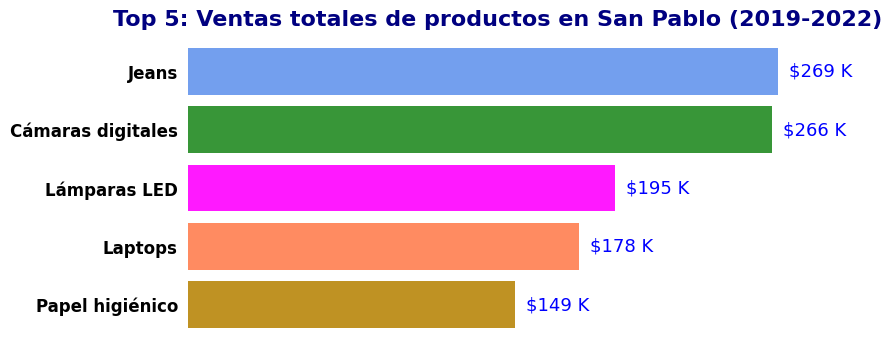

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_top5_sorted = df_top5_productos_total_venta.sort_values(by='total_venta', ascending=True) # Ordenar el DataFrame de mayor a menor

# Paleta de colores
palette1=['darkgoldenrod','coral','magenta','forestgreen','cornflowerblue']
fig, ax = plt.subplots(figsize=(8, 4))

bar_positions = np.arange(len(df_top5_sorted.index))  # Configurar la posición de las barras
ax.barh(bar_positions, df_top5_sorted['total_venta'], color=palette1,alpha=.9)  # Crear barras horizontales

# Configurar el eje x, y
ax.set_yticks(bar_positions)
ax.set_yticklabels(df_top5_sorted.index, fontsize=12, fontweight='bold')
ax.set_xticks([])

# Configurar etiquetas y leyenda
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Top 5: Ventas totales de productos en San Pablo (2019-2022)', color='navy', fontweight='bold', fontsize=16)

# Mostrar etiquetas en las barras
for i, value in enumerate(df_top5_sorted['total_venta']):
    ax.text(value + 5e3, i, f'${value/1e3:.0f} K', va='center', ha='left', fontsize=13, color='blue')

# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

plt.show()


In [ ]:
### CREAR TRANSPUESTA
df_grafica_top_productos=df_top_tipo_producto_trimestres_2019_top5.drop(f'total_venta', axis=1).T ### ELIMINANDO COLUMNA SUMA
df_grafica_top_productos_index=df_grafica_top_productos.copy()
df_grafica_top_productos_index.reset_index(inplace=True,drop=True)  # resetear index
df_grafica_top_productos_orden = df_grafica_top_productos_index.rename_axis('orden') # cambiar nombre index

df_grafica_top_productos_orden

tipo_producto,Jeans,Cámaras digitales,Lámparas LED,Laptops,Papel higiénico
orden,,,,,
0,9998.02,4596.28,3132.72,0.00,1276.57
1,2488.61,6924.12,1100.96,0.00,1319.67
2,21142.68,16666.58,3067.76,9893.85,10333.70
3,24408.41,19636.33,2726.00,0.00,24426.25
4,1304.24,6323.04,4438.83,0.00,8377.51
5,3456.24,5484.74,29797.43,9519.79,2667.29
6,16065.75,17261.04,5531.57,4623.92,11337.43
7,26070.09,33864.05,5817.29,6085.90,10372.66
8,1110.60,5067.63,6487.74,3263.88,4598.99


In [ ]:
df_grafica_top_productos_index

tipo_producto,Jeans,Cámaras digitales,Lámparas LED,Laptops,Papel higiénico
0,9998.02,4596.28,3132.72,0.00,1276.57
1,2488.61,6924.12,1100.96,0.00,1319.67
2,21142.68,16666.58,3067.76,9893.85,10333.70
3,24408.41,19636.33,2726.00,0.00,24426.25
4,1304.24,6323.04,4438.83,0.00,8377.51
5,3456.24,5484.74,29797.43,9519.79,2667.29
6,16065.75,17261.04,5531.57,4623.92,11337.43
7,26070.09,33864.05,5817.29,6085.90,10372.66
8,1110.60,5067.63,6487.74,3263.88,4598.99
9,27680.88,7306.51,4387.11,0.00,7436.90


In [ ]:
# Lista de nombres para crear una columnas y luego renombrar el index:
periodos = ['2019: Ene-Mar', '2019: Abr-Jun', '2019: Jul-Set', '2019: Oct-Dic',
            '2020: Ene-Mar', '2020: Abr-Jun', '2020: Jul-Set', '2020: Oct-Dic',
            '2021: Ene-Mar', '2021: Abr-Jun', '2021: Jul-Set', '2021: Oct-Dic',
            '2022: Ene-Mar', '2022: Abr-Jun', '2022: Jul-Set', '2022: Oct-Dic']

df_grafica_top_productos_index['periodo'] = periodos
df_grafica_top_productos_index = df_grafica_top_productos_index.set_index('periodo') # Establecer la nueva columna como índice
df_grafica_top_productos_index

tipo_producto,Jeans,Cámaras digitales,Lámparas LED,Laptops,Papel higiénico
periodo,,,,,
2019: Ene-Mar,9998.02,4596.28,3132.72,0.00,1276.57
2019: Abr-Jun,2488.61,6924.12,1100.96,0.00,1319.67
2019: Jul-Set,21142.68,16666.58,3067.76,9893.85,10333.70
2019: Oct-Dic,24408.41,19636.33,2726.00,0.00,24426.25
2020: Ene-Mar,1304.24,6323.04,4438.83,0.00,8377.51
2020: Abr-Jun,3456.24,5484.74,29797.43,9519.79,2667.29
2020: Jul-Set,16065.75,17261.04,5531.57,4623.92,11337.43
2020: Oct-Dic,26070.09,33864.05,5817.29,6085.90,10372.66
2021: Ene-Mar,1110.60,5067.63,6487.74,3263.88,4598.99


In [ ]:
df_tipo_producto_trimestres_total.index

Index(['Jeans', 'Cámaras digitales', 'Detergente para ropas',
       'Papel higiénico', 'Detergente para platos', 'Ambientador en spray',
       'Lámparas LED', 'Laptops', 'Smartphones', 'Bolsas de basura',
       'Vestidos', 'Zapatillas', 'Toallitas desinfectantes',
       'Limpiador de inodoros', 'Limpiacristales', 'Camisetas',
       'Cepillos de baño'],
      dtype='object', name='tipo_producto')

In [ ]:
!pip install bar_chart_race --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
df_grafica_top_productos_index.index

Index(['2019: Ene-Mar', '2019: Abr-Jun', '2019: Jul-Set', '2019: Oct-Dic',
       '2020: Ene-Mar', '2020: Abr-Jun', '2020: Jul-Set', '2020: Oct-Dic',
       '2021: Ene-Mar', '2021: Abr-Jun', '2021: Jul-Set', '2021: Oct-Dic',
       '2022: Ene-Mar', '2022: Abr-Jun', '2022: Jul-Set', '2022: Oct-Dic'],
      dtype='object', name='periodo')

### Visualización

In [ ]:
# import bar_chart_race as bcr

# n_barras=len(df_grafica_top_productos_index.index)

# animacion_top_5 = bcr.bar_chart_race(df_grafica_top_productos_index, steps_per_period=30, period_length=2500,
#                    fixed_max=True,
#                    fixed_order=False,
#                    n_bars=5,
#                    figsize=(9, 4),
#                    title='Top 5: Ventas por trimestre en San Pablo',
#                    title_size=20,
#                    label_bars=True,
#                    bar_size=0.95,
#                    period_label={'x': 0.9, 'y': 0.8, 'ha': 'right', 'va': 'center', 'fontsize': 14, 'color': 'navy'},
#                    tick_label_size=8, bar_label_size=8,
#                    period_fmt='Año {x}',
#                    )

# animacion_top_5

In [ ]:
!pip install pillow

In [ ]:
###  GUARDAR GRAFICA  ####
## Guardar la animación como un archivo MP4
import bar_chart_race as bcr

bcr.bar_chart_race(df_grafica_top_productos_index,'/content/drive/MyDrive/Colab Notebooks/animacion_top_5_last.mp4', steps_per_period=25, period_length=1000,
                   fixed_max=True,
                   fixed_order=False,
                   n_bars=5,
                   figsize=(9, 4),
                   title='Top 5: Ventas por trimestre en San Pablo',
                   title_size=20,
                   label_bars=True,
                   bar_size=0.95,
                   period_label={'x': 0.9, 'y': 0.8, 'ha': 'right', 'va': 'center', 'fontsize': 14, 'color': 'navy'},
                   tick_label_size=8, bar_label_size=8,
                   period_fmt='Año {x}',
                   )

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


### Gráfica de barras de Top 5 de productos por trimestre (2019 al 2022)

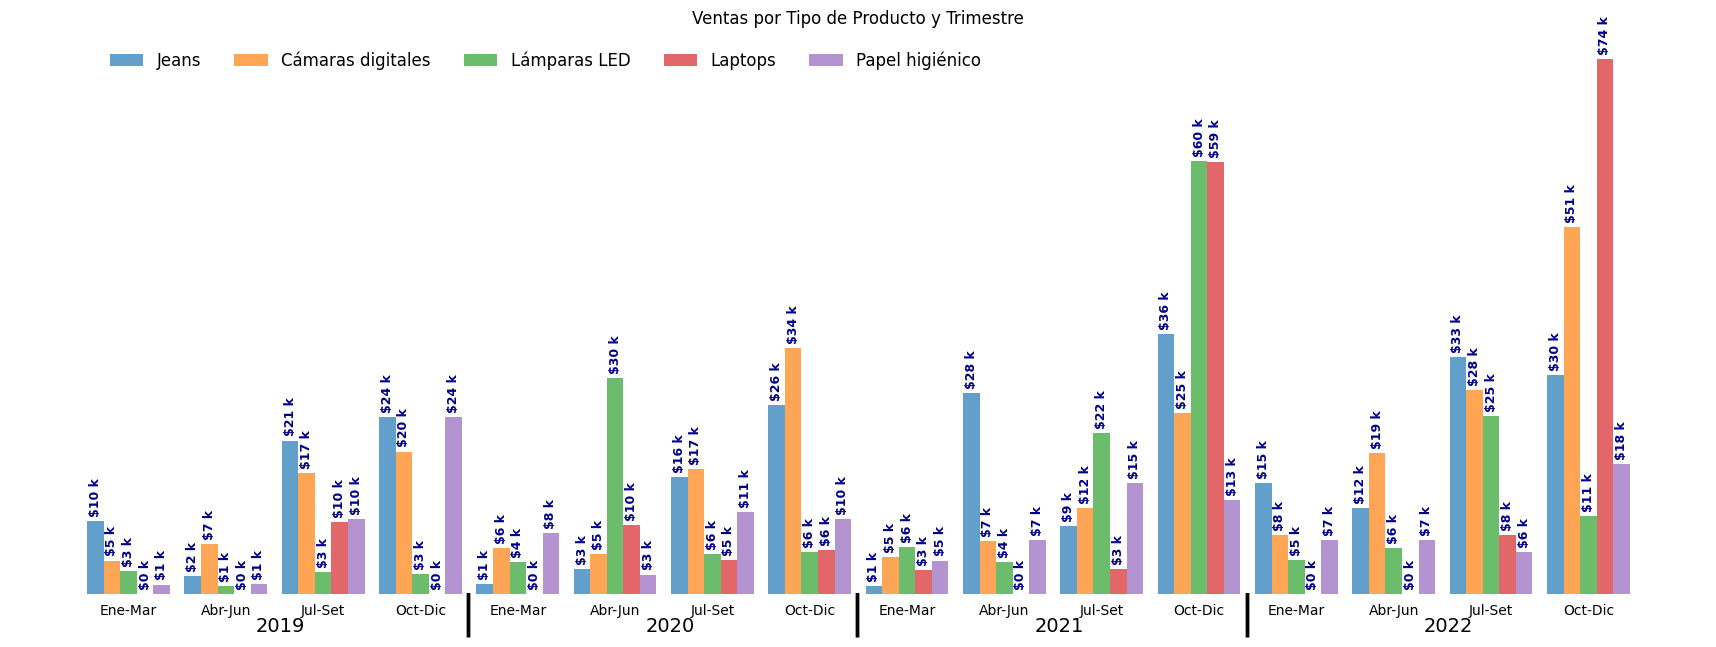

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
bar_width = 0.17
opacity = 0.7

# Paleta de colores
# palette1=['orange','brown','magenta','forestgreen','cornflowerblue']
palette1=['coral','darkgoldenrod','magenta','forestgreen','cornflowerblue'][::-1]

# Crear barras para cada trimestre
for i, (trimestre, ventas) in enumerate(df_grafica_top_productos.items()):
    posiciones = [j + bar_width * i for j in range(len(df_grafica_top_productos))]
    plt.bar(posiciones, ventas, bar_width, alpha=opacity, label=trimestre)

# Configurar etiquetas y leyenda
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas')
plt.title('Ventas por Tipo de Producto y Trimestre')
plt.xticks([j + bar_width for j in range(len(df_grafica_top_productos))], df_grafica_top_productos.index, rotation=45)
# plt.legend(loc='best')

legend_x = 0.05  # Ajusta la coordenada x de la leyenda
legend_y = 0.95  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df.columns))

# Colocar el valor al final de las barras
for i, (trimestre, ventas) in enumerate(df_grafica_top_productos.items()):
    for j, venta in enumerate(ventas):
        plt.text(j + bar_width * i, venta+1000, f'${venta/1000:.0f} k', ha='center',rotation=90,fontsize=9,fontweight='bold',color='darkblue')


# Añadir espacio entre las barras
plt.tight_layout()
plt.box(False)
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

# Establecer etiquetas personalizadas en el eje x
xticks=['Ene-Mar','Abr-Jun','Jul-Set','Oct-Dic']*4
# xticks=['Trimestre 1\n2019','Trimestre 2\n2019','Trimestre 3\n2019','Trimestre 4\n2019','Trimestre 1\n2020','Trimestre 2\n2020','Trimestre 3\n2020','Trimestre 4\n2020','Trimestre 1\n2021','Trimestre 2\n2021','Trimestre 3\n2021','Trimestre 4\n2021','Trimestre 1\n2022','Trimestre 2\n2022','Trimestre 3\n2022','Trimestre 4\n2022']
plt.xticks([j + bar_width * (len(df_grafica_top_productos.columns) // 2) for j in range(len(xticks))], xticks, rotation=0, ha='center')

# Agrega el año debajo de los ticks correspondientes
años=['2019','2019','2019','2019','2020','2020','2020','2020','2021','2021','2021','2021','2022','2022','2022','2022']
for i in range(0, len(años), 4):
    ax.text(1.65+i, -5200,años[i], ha='left',fontsize=14)
    if i<12:
      ax.text(3.75+i, -4500,'|', ha='left',fontsize=32)

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()


### Realizar modelo para predecir valores de venta en trimestres del 2023


In [ ]:
# df es el dataframe para la gradica de ventas totales por trimestres desde 2019 al 2022:
df_nuevo=df_visulizar_ventas_x_trimestre_año.copy()
df_mes_3 = df_nuevo[df_nuevo['mes'] == 3]
df_mes_6 = df_nuevo[df_nuevo['mes'] == 6]
df_mes_9 = df_nuevo[df_nuevo['mes'] == 9]
df_mes_12 = df_nuevo[df_nuevo['mes'] == 12]
df_mes_3

,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,27.38,False,2019,3
4,2020-03-31,26.73,False,2020,3
8,2021-03-31,35.74,False,2021,3
12,2022-03-31,61.79,False,2022,3


In [ ]:
df_mes_6

,fecha_pedido,total_venta,es_diciembre,año,mes
1,2019-06-30,33.95,False,2019,6
5,2020-06-30,66.15,False,2020,6
9,2021-06-30,95.44,False,2021,6
13,2022-06-30,74.73,False,2022,6


In [ ]:
!pip install numpy scikit-learn

In [ ]:
df_nuevo.fecha_pedido.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16 entries, 0 to 15
Series name: fecha_pedido
Non-Null Count  Dtype         
--------------  -----         
16 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 256.0 bytes


In [ ]:
type(df_mes_3['fecha_pedido'])

pandas.core.series.Series

In [ ]:
import pandas as pd

# Definir las listas de fechas
x_predic_3 = ['2020-3-31', '2021-3-31', '2022-3-31', '2023-3-31']
x_predic_6 = ['2020-6-30', '2021-6-30', '2022-6-30', '2023-6-30']
x_predic_9 = ['2020-9-30', '2021-9-30', '2022-9-30', '2023-9-30']
x_predic_12 = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31']

# Crear un DataFrame con las fechas
df_fechas = pd.DataFrame({'fechas_3': x_predic_3, 'fechas_6': x_predic_6, 'fechas_9': x_predic_9, 'fechas_12': x_predic_12})

# Convertir las columnas de fechas al formato datetime64[ns]
df_fechas['fechas_3'] = pd.to_datetime(df_fechas['fechas_3'])
df_fechas['fechas_6'] = pd.to_datetime(df_fechas['fechas_6'])
df_fechas['fechas_9'] = pd.to_datetime(df_fechas['fechas_9'])
df_fechas['fechas_12'] = pd.to_datetime(df_fechas['fechas_12'])

df_fechas

,fechas_3,fechas_6,fechas_9,fechas_12
0,2020-03-31,2020-06-30,2020-09-30,2020-12-31
1,2021-03-31,2021-06-30,2021-09-30,2021-12-31
2,2022-03-31,2022-06-30,2022-09-30,2022-12-31
3,2023-03-31,2023-06-30,2023-09-30,2023-12-31


### Visualizar scatter por trimestre de años 2019 al 2022 con linea de tendencia
### Entrenando el modelo con sklearn.linear_model: LinearRegression

<ipython-input-195-ac74a40eed39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-195-ac74a40eed39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-195-ac74a40eed39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

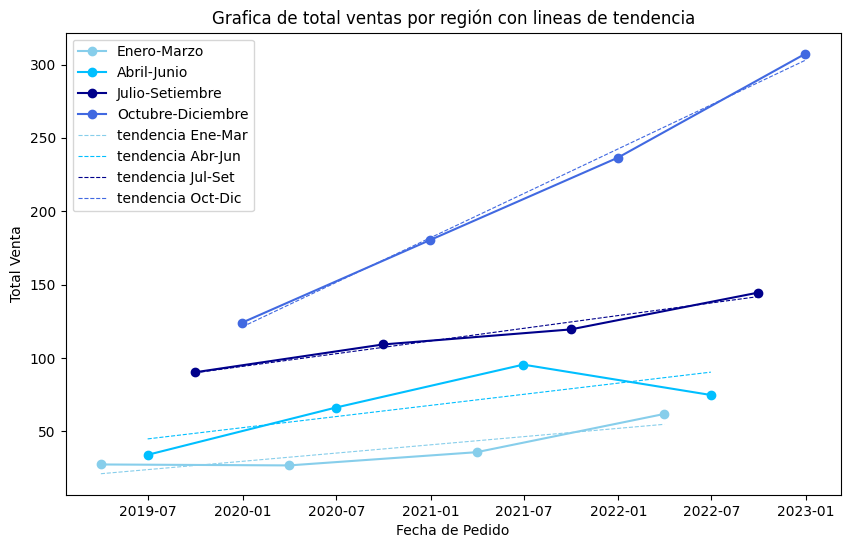

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir 'fecha_pedido' a timestamp:
df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_9['fecha_pedido_timestamp'] = df_mes_9['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_12['fecha_pedido_timestamp'] = df_mes_12['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds9

# Extraer X, Y para entrenar el modelo:
x_3 = df_mes_3['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_3= df_mes_3['total_venta'].values

x_6 = df_mes_6['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_6= df_mes_6['total_venta'].values

x_9 = df_mes_9['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_9= df_mes_9['total_venta'].values

x_12 = df_mes_12['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_12= df_mes_12['total_venta'].values

#Crear y ajustar el modelo de regresión lineal:
model_3 = LinearRegression()
model_6 = LinearRegression()
model_9 = LinearRegression()
model_12 = LinearRegression()

model_3.fit(x_3, y_3)
model_6.fit(x_6, y_6)
model_9.fit(x_9, y_9)
model_12.fit(x_12, y_12)

#############  fechas a predecir  #################
x_000=['2020-12-31','2021-12-31','2022-12-31','2023-12-31'] ### AGREGO '2023-12-31' PARA PREDECIR
x_000_series = pd.to_datetime(x_000)
x_000_series_reshaped = x_000_series.values.reshape(-1, 1)
x_000_series_reshaped
# y_000=model_12.predict(x_000_series_reshaped)
# print('PREDICCION: ', y_000)

# Prediccion de valores basados en el modelo de regresion lineal:
y_pred_3 = model_3.predict(x_3)
y_pred_6 = model_6.predict(x_6)
y_pred_9 = model_9.predict(x_9)
y_pred_12 = model_12.predict(x_12)


plt.figure(figsize=(10, 6))

plt.plot(df_mes_3['fecha_pedido'], df_mes_3['total_venta'], marker='o', label='Enero-Marzo', color='skyblue')
plt.plot(df_mes_6['fecha_pedido'], df_mes_6['total_venta'], marker='o', label='Abril-Junio', color='deepskyblue')
plt.plot(df_mes_9['fecha_pedido'], df_mes_9['total_venta'], marker='o', label='Julio-Setiembre', color='darkblue')
plt.plot(df_mes_12['fecha_pedido'], df_mes_12['total_venta'], marker='o', label='Octubre-Diciembre', color='royalblue')

# Trazar la lineas de tendencia:
plt.plot(df_mes_3['fecha_pedido'], y_pred_3, color='skyblue', label='tendencia Ene-Mar', linestyle='--', linewidth=.8)
plt.plot(df_mes_6['fecha_pedido'], y_pred_6, color='deepskyblue', label='tendencia Abr-Jun ', linestyle='--', linewidth=.8)
plt.plot(df_mes_9['fecha_pedido'], y_pred_9, color='darkblue', label='tendencia Jul-Set', linestyle='--', linewidth=.8)
plt.plot(df_mes_12['fecha_pedido'], y_pred_12, color='royalblue', label='tendencia Oct-Dic', linestyle='--', linewidth=.8)

plt.xlabel('Fecha de Pedido')
plt.ylabel('Total Venta')
plt.title('Grafica de total ventas por región con lineas de tendencia')
plt.legend()

plt.show()


In [ ]:
df_mes_3['fecha_pedido_timestamp']

0     1.553990e+09
4     1.585613e+09
8     1.617149e+09
12    1.648685e+09
Name: fecha_pedido_timestamp, dtype: float64

In [ ]:
df_mes_3

,fecha_pedido,total_venta,es_diciembre,año,mes,fecha_pedido_timestamp
0,2019-03-31,27.38,False,2019,3,1.553990e+09
4,2020-03-31,26.73,False,2020,3,1.585613e+09
8,2021-03-31,35.74,False,2021,3,1.617149e+09
12,2022-03-31,61.79,False,2022,3,1.648685e+09


In [ ]:
df

tipo_producto,Jeans,Cámaras digitales,Lámparas LED,Laptops,Papel higiénico
2019,58037.72,47823.31,10027.44,9893.85,37356.19
2020,46896.32,62932.87,45585.12,20229.61,32754.89
2021,73932.29,49174.25,92739.28,66163.65,40289.10
2022,89945.55,106318.16,46280.22,81939.64,38434.35


### Predicciones y agregado de filas al df para graficar:

In [ ]:
######## PREDICCION DE TENDENCIA DE VALORES CONSIDERANDO TRIMESTRES POR AÑO 2023   #########
from datetime import datetime

x_predic_3 = ['2020-3-31', '2021-3-31', '2022-3-31', '2023-3-31'] ### predecir en el primer trimestre
x_predic_6 = ['2020-6-30', '2021-6-30', '2022-6-30', '2023-6-30'] ### segundo
x_predic_9 = ['2020-9-30', '2021-9-30', '2022-9-30', '2023-9-30'] ### tercero
x_predic_12 = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31'] ### cuarto
df_fechas = pd.DataFrame({'fechas_3': x_predic_3,'fechas_6':x_predic_6,'fechas_9':x_predic_9,'fechas_12':x_predic_12})

df_fechas['fechas_3'] = pd.to_datetime(df_fechas['fechas_3'])
df_fechas['fechas_6'] = pd.to_datetime(df_fechas['fechas_6'])
df_fechas['fechas_9'] = pd.to_datetime(df_fechas['fechas_9'])
df_fechas['fechas_12'] = pd.to_datetime(df_fechas['fechas_12'])

x_predic_3= df_fechas['fechas_3'].astype(int) / 10**9
x_predic_3_array = x_predic_3.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_6= df_fechas['fechas_6'].astype(int) / 10**9
x_predic_6_array = x_predic_6.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_9= df_fechas['fechas_9'].astype(int) / 10**9
x_predic_9_array = x_predic_9.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_12= df_fechas['fechas_12'].astype(int) / 10**9
x_predic_12_array = x_predic_12.values.reshape(-1, 1) ### convierte la serie en un array

###   TRATANDO FECHAS PARA EL NUEVO DF PARA GRAFICAR   ###
x_predic_3_array_datetime = datetime.utcfromtimestamp(x_predic_3_array[-1:][0][0])
fecha_formato_str_3 = x_predic_3_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_3 = int(x_predic_3_array_datetime.strftime('%Y'))
fecha_formato_str_month_3 = int(x_predic_3_array_datetime.strftime('%m'))

x_predic_6_array_datetime = datetime.utcfromtimestamp(x_predic_6_array[-1:][0][0])
fecha_formato_str_6 = x_predic_6_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_6 = int(x_predic_6_array_datetime.strftime('%Y'))
fecha_formato_str_month_6 = int(x_predic_6_array_datetime.strftime('%m'))

x_predic_9_array_datetime = datetime.utcfromtimestamp(x_predic_9_array[-1:][0][0])
fecha_formato_str_9 = x_predic_9_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_9 = int(x_predic_9_array_datetime.strftime('%Y'))
fecha_formato_str_month_9 = int(x_predic_9_array_datetime.strftime('%m'))

x_predic_12_array_datetime = datetime.utcfromtimestamp(x_predic_12_array[-1:][0][0])
fecha_formato_str_12 = x_predic_12_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_12 = int(x_predic_12_array_datetime.strftime('%Y'))
fecha_formato_str_month_12 = int(x_predic_12_array_datetime.strftime('%m'))


y_predic_3= round((model_3.predict(x_predic_3_array))[-1:][0],2)
y_predic_6= round((model_6.predict(x_predic_6_array))[-1:][0],2)
y_predic_9= round((model_9.predict(x_predic_9_array))[-1:][0],2)
y_predic_12= round((model_12.predict(x_predic_12_array))[-1:][0],2)

print('PREDICCION: ', y_predic_3,'  -  ', y_predic_6,'  -  ', y_predic_9,'  -  ', y_predic_12)
print('fECHAS: ', fecha_formato_str_3,'  -  ', fecha_formato_str_6,'  -  ', fecha_formato_str_9,'  -  ', fecha_formato_str_12)


#### AGREGAR FILAS AL DF ORIGINAL  ####
nueva_fila_3 = {'fecha_pedido':fecha_formato_str_3 , 'total_venta': y_predic_3, 'es_diciembre': False, 'año': fecha_formato_str_year_3, 'mes': fecha_formato_str_month_3}
nueva_fila_6 = {'fecha_pedido': fecha_formato_str_6, 'total_venta': y_predic_6, 'es_diciembre': False, 'año': fecha_formato_str_year_6, 'mes': fecha_formato_str_month_6}
nueva_fila_9 = {'fecha_pedido': fecha_formato_str_9, 'total_venta': y_predic_9, 'es_diciembre': False, 'año': fecha_formato_str_year_9, 'mes': fecha_formato_str_month_9}
nueva_fila_12 = {'fecha_pedido': fecha_formato_str_12, 'total_venta': y_predic_12, 'es_diciembre': True, 'año': fecha_formato_str_year_12, 'mes': fecha_formato_str_month_12}

# df_new=df.copy()
df_new=df_visulizar_ventas_x_trimestre_año.copy()

df_new = df_new.append(nueva_fila_3, ignore_index=True) #adicionar fila
df_new = df_new.append(nueva_fila_6, ignore_index=True)
df_new = df_new.append(nueva_fila_9, ignore_index=True)
df_new = df_new.append(nueva_fila_12, ignore_index=True)
df_new['fecha_pedido'] = pd.to_datetime(df_new['fecha_pedido']) # corregir fechas

df_new

PREDICCION:  65.95   -   105.47   -   159.1   -   363.48
fECHAS:  2023-03-31   -   2023-06-30   -   2023-09-30   -   2023-12-31


<ipython-input-199-06f9f808fe14>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(nueva_fila_3, ignore_index=True) #adicionar fila
<ipython-input-199-06f9f808fe14>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(nueva_fila_6, ignore_index=True)
<ipython-input-199-06f9f808fe14>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(nueva_fila_9, ignore_index=True)
<ipython-input-199-06f9f808fe14>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(nueva_fila_12, ignore_index=True)


,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,27.38,False,2019,3
1,2019-06-30,33.95,False,2019,6
2,2019-09-30,90.21,False,2019,9
3,2019-12-31,124.09,True,2019,12
4,2020-03-31,26.73,False,2020,3
5,2020-06-30,66.15,False,2020,6
6,2020-09-30,109.18,False,2020,9
7,2020-12-31,180.42,True,2020,12
8,2021-03-31,35.74,False,2021,3
9,2021-06-30,95.44,False,2021,6


### Cálculo de errores:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Calculo de error:
def calcular_error_y_mostrar(modelo, x, y, trimestre):
    # Realizar predicciones
    y_pred = modelo.predict(x)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Calcular el error absoluto medio
    mae = mean_absolute_error(y, y_pred)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, y_pred)

    return f'{trimestre}\nMSE: {mse:.1f}\nMAE: ${mae:.1f}mll\nR2: {r2:.2f}'

# Calcular y mostrar el error para cada modelo
error_3=calcular_error_y_mostrar(model_3, x_3, y_3, 'Enero-Marzo')
error_6=calcular_error_y_mostrar(model_6, x_6, y_6, 'Abril-Junio')
error_9=calcular_error_y_mostrar(model_9, x_9, y_9, 'Julio-Setiembre')
error_12=calcular_error_y_mostrar(model_12, x_12, y_12, 'Octubre-Diciembre')
print('Errores: ',error_3,error_6,error_9,error_12)

Errores:  Enero-Marzo
MSE: 45.3
MAE: $6.7mll
R2: 0.78 Abril-Junio
MSE: 202.5
MAE: $13.2mll
R2: 0.59 Julio-Setiembre
MSE: 9.3
MAE: $2.5mll
R2: 0.98 Octubre-Diciembre
MSE: 16.3
MAE: $3.7mll
R2: 1.00


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Calculo de error:
def calcular_error_mae(modelo, x, y, trimestre):
    # Realizar predicciones
    y_pred = modelo.predict(x)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Calcular el error absoluto medio
    mae = mean_absolute_error(y, y_pred)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, y_pred)

    return mae.round(2)
    # return f'{trimestre}\nMSE: {mse:.1f}\nMAE: ${mae:.1f}mll\nR2: {r2:.1%}'

# Calcular y mostrar el error para cada modelo
error_3_mae=calcular_error_mae(model_3, x_3, y_3, 'Enero-Marzo')
error_6_mae=calcular_error_mae(model_6, x_6, y_6, 'Abril-Junio')
error_9_mae=calcular_error_mae(model_9, x_9, y_9, 'Julio-Setiembre')
error_12_mae=calcular_error_mae(model_12, x_12, y_12, 'Octubre-Diciembre')
errores_mae=[error_3_mae,error_6_mae,error_9_mae,error_12_mae]
print('ERRORE: ',error_3_mae,error_6_mae,error_9_mae,error_12_mae)

ERRORE:  6.68 13.22 2.54 3.67


In [ ]:
df_new

,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,27.38,False,2019,3
1,2019-06-30,33.95,False,2019,6
2,2019-09-30,90.21,False,2019,9
3,2019-12-31,124.09,True,2019,12
4,2020-03-31,26.73,False,2020,3
5,2020-06-30,66.15,False,2020,6
6,2020-09-30,109.18,False,2020,9
7,2020-12-31,180.42,True,2020,12
8,2021-03-31,35.74,False,2021,3
9,2021-06-30,95.44,False,2021,6


In [ ]:
df_totales_x_trimestre=df_new.copy()
suma_tri=df_totales_x_trimestre.groupby('año')['total_venta'].sum()
axd=pd.DataFrame(suma_tri)
axd

,total_venta
año,
2019,275.63
2020,382.48
2021,487.10
2022,588.40
2023,694.00


### Visualización de predicciones

In [ ]:
type(error_3)

str

<function matplotlib.pyplot.show(close=None, block=None)>

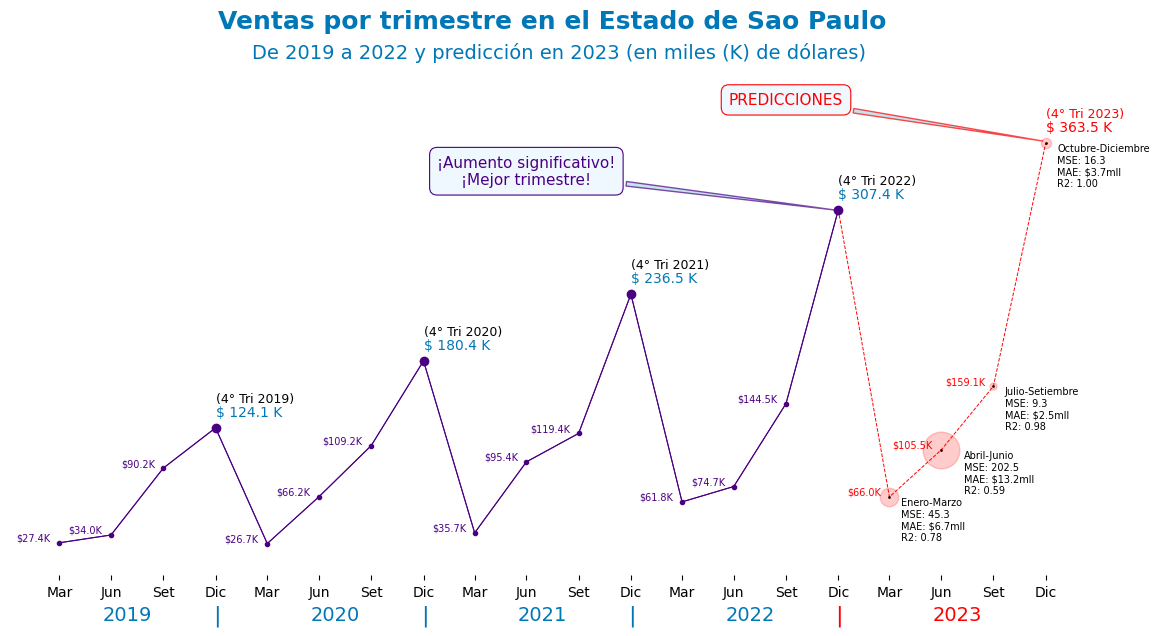

In [ ]:
df=df_new.copy()
df_visual=df_visulizar_ventas_x_trimestre_año.copy()

fig, ax = plt.subplots(figsize=(14,7))

# Datos para agregar etiquetas
for i, row in df.iterrows():
    index = df.index
    if i<16:
      color = 'red' if i not in index else 'indigo' if i != 7 and i % 4 != 3 else 'white'
    else:
      color = 'red' if i not in index else 'red' if i != 7 and i % 4 != 3 else 'white'
    ax.text(row['fecha_pedido']-pd.DateOffset(days=15), row['total_venta'], f'${row["total_venta"]:.1f}K', ha='right', va='bottom', fontsize=7, rotation=0, color=color)

# Etiqueta de errores en predicciones:
ax.text((df['fecha_pedido'][16])+pd.DateOffset(days=20), df['total_venta'][16], error_3, ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][17])+pd.DateOffset(days=40), df['total_venta'][17], error_6, ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][18])+pd.DateOffset(days=20), df['total_venta'][18], error_9, ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][19])+pd.DateOffset(days=20), df['total_venta'][19], error_12, ha='left', va='top', fontsize=7,)

# Graficar ventas en función de trimestres:
mask = df.index[-5:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], color='red', label='Diciembre',linewidth=0.7,markersize=1, linestyle='--' )
mask = df.index[-4:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='black', label='Diciembre',linewidth=0.7,markersize=1, linestyle='' )

### Burbuja del error: MAE
mask = df.index[-4:-3]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_mae[0]*2, linestyle='', alpha=.2)
mask = df.index[-3:-2]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_mae[1]*2, linestyle='', alpha=.2)
mask = df.index[-2:-1]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_mae[2]*2, linestyle='', alpha=.2)
mask = df.index[-1:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_mae[3]*2, linestyle='', alpha=.2)
### marcador de límite para burbujas del MAE
# ax.plot(df.loc[mask, 'fecha_pedido'], 367.2, marker="o", color='black', markersize=1, linestyle='', alpha=1)


# Condicionar el color de los últimos 4 puntos
mask = df.index[:-4]
### GRAFICA:
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", markevery=df.loc[mask, 'es_diciembre'], color='indigo', label='Diciembre',linewidth=0.8)
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='indigo', label='Diciembre',linewidth=0.7,markersize=3)

## Colocar xticks
x_labels = ["Mar", "Jun", "Set", "Dic"] * 5
x_labels_años=[2019,2020,2021,2022,2023]*4
x_labels_año = df['año']
ax.set_xticks(df.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

## texto en puntos del cuarto trimestre
for i in range(3, len(df["total_venta"]), 4):
  posicionX=ax.get_xticks()[i]
  posicionY=df["total_venta"][i]
  if i<16:
      color_valor = '#0077b6'
      color_tri = 'black'
  else:
      color_valor = 'red'
      color_tri = 'red'
  ax.text(posicionX, posicionY+10, f'$ {posicionY:0.1f} K',fontsize=10,color=color_valor)
  ax.text(posicionX, posicionY+22, f'(4° Tri {x_labels_año[i]})',fontsize=9,color=color_tri)
  # ax.text(posicionX*1.008, posicionY+11, f'(4° Tri {x_labels_año[i]})',fontsize=9,color=color_tri)

### Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df), 4):
    if i<=12:
      ax.text(df['fecha_pedido'].iloc[i+1]-pd.DateOffset(days=15), -38,str(df['año'].iloc[i]), ha='left',fontsize=14,color='#0077b6')
    else:
      ax.text(df['fecha_pedido'].iloc[i+1]-pd.DateOffset(days=15), -38,str(df['año'].iloc[i]), ha='left',fontsize=14,color='red')

    if i<12:
      ax.text(df['fecha_pedido'].iloc[i+3]-pd.DateOffset(days=5), -38,'|', ha='left',fontsize=16,color='#0077b6')
    elif i<16:
      ax.text(df['fecha_pedido'].iloc[i+3]-pd.DateOffset(days=5), -38,'|', ha='left',fontsize=16,color='red')

### Título
plt.title('Ventas por trimestre en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')
### Subtítulo
ax.text((df['fecha_pedido'].iloc[3])+pd.DateOffset(days=65),435,'De 2019 a 2022 y predicción en 2023 (en miles (K) de dólares)', fontsize=14,color='#0077b6')

plt.box([])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
insight = "¡Aumento significativo!\n¡Mejor trimestre!"
bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='indigo', lw=.8)
plt.annotate(insight, xy=(df['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
            ha='center', va='center', fontsize=11, color='indigo', bbox=bbox_props,
            arrowprops=dict(facecolor='lightblue', edgecolor='indigo', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# Agrega una anotación resaltada con annotate
insight = "PREDICCIONES"
bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='red', lw=.8)
plt.annotate(insight, xy=(df['fecha_pedido'].iloc[-1], 365), xytext=(df['fecha_pedido'].iloc[14], 400),
            ha='center', va='center', fontsize=11, color='red', bbox=bbox_props,
            arrowprops=dict(facecolor='lightblue', edgecolor='red', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

ax.set_ylim(bottom=0, top=df['total_venta'].max() + 90)  # Ajusta el rango superior según sea necesario
plt.show

In [ ]:
df_ventas_limpio.tipo_producto.unique()

array(['Camisetas', 'Jeans', 'Toallitas desinfectantes',
       'Papel higiénico', 'Vestidos', 'Limpiador de inodoros',
       'Cámaras digitales', 'Lámparas LED', 'Ambientador en spray',
       'Zapatillas', 'Smartphones', 'Limpiacristales', 'Bolsas de basura',
       'Cepillos de baño', 'Detergente para platos',
       'Detergente para ropas', 'Laptops'], dtype=object)

#Crear df con articulos top 5 para graficar predicciones

###JEANS

In [ ]:
def top_5_ventas_articulo():
  global df_ventas, df_ventas_limpio, df_ventas_año,df_modo_envio,df_ventas_sp
  df_ventas_sp=df_ventas_limpio.copy() # Haciendo la copia
  df_ventas_sp = df_ventas_sp[df_ventas_sp['estado'] == 'São Paulo'] # selección sólo de San Pablo
  df_ventas_sp= (df_ventas_sp[['fecha_pedido','total_venta','tipo_producto']]) # establecer estas columnas
  df_ventas_sp.set_index('fecha_pedido', inplace=True) #nuevo index
  return df_ventas_sp
df_ventas_sp_new= top_5_ventas_articulo()
df_ventas_sp_new.head(3)

,total_venta,tipo_producto
fecha_pedido,,
2021-11-09,890.66,Camisetas
2021-11-09,2488.59,Jeans
2019-11-12,2263.98,Papel higiénico


In [ ]:
df_top5_productos_x_trimestre=df_ventas_sp_new.copy()

### CREAR LISTAS DE 'total_venta' POR PRODUCTOS TOP 5
total_venta_camaras = df_top5_productos_x_trimestre.loc[df_top5_productos_x_trimestre['tipo_producto'] == 'Cámaras digitales', 'total_venta']
total_venta_jeans = df_top5_productos_x_trimestre.loc[df_top5_productos_x_trimestre['tipo_producto'] == 'Jeans', 'total_venta']
total_venta_lamparas = df_top5_productos_x_trimestre.loc[df_top5_productos_x_trimestre['tipo_producto'] == 'Lámparas LED', 'total_venta']
total_venta_Laptops = df_top5_productos_x_trimestre.loc[df_top5_productos_x_trimestre['tipo_producto'] == 'Laptops', 'total_venta']
total_venta_higienico = df_top5_productos_x_trimestre.loc[df_top5_productos_x_trimestre['tipo_producto'] == 'Papel higiénico', 'total_venta']

###CREAR DF POR PRODUCTO
total_venta_camaras= pd.DataFrame(total_venta_camaras)
total_venta_camaras = total_venta_camaras.rename(columns={'total_venta': 'total_venta_camaras'})
total_venta_camaras.columns = ['total_venta_camaras']
total_venta_camaras=total_venta_camaras.resample('Q').agg('sum')

total_venta_jeans= pd.DataFrame(total_venta_jeans)
total_venta_jeans = total_venta_jeans.rename(columns={'total_venta': 'total_venta_jeans'})
total_venta_jeans.columns = ['total_venta_jeans']
total_venta_jeans=total_venta_jeans.resample('Q').agg('sum')

total_venta_lamparas= pd.DataFrame(total_venta_lamparas)
total_venta_lamparas = total_venta_lamparas.rename(columns={'total_venta': 'total_venta_lamparas'})
total_venta_lamparas.columns = ['total_venta_lamparas']
total_venta_lamparas=total_venta_lamparas.resample('Q').agg('sum')

total_venta_Laptops= pd.DataFrame(total_venta_Laptops)
total_venta_Laptops = total_venta_Laptops.rename(columns={'total_venta': 'total_venta_Laptops'})
total_venta_Laptops.columns = ['total_venta_Laptops']
total_venta_Laptops=total_venta_Laptops.resample('Q').agg('sum')

total_venta_higienico= pd.DataFrame(total_venta_higienico)
total_venta_higienico = total_venta_higienico.rename(columns={'total_venta': 'total_venta_higienico'})
total_venta_higienico.columns = ['total_venta_higienico']
total_venta_higienico=total_venta_higienico.resample('Q').agg('sum')

df_top5_productos_x_trimestre_final=pd.concat([total_venta_camaras,total_venta_jeans,total_venta_lamparas,total_venta_Laptops,total_venta_higienico], axis=1) ###concatenar los df
df_top5_productos_x_trimestre_final=df_top5_productos_x_trimestre_final.fillna(0) ###reemplazar lo nan por cero

df_top5_productos_x_trimestre_final=round(df_top5_productos_x_trimestre_final/1000,2)
df_top5_productos_x_trimestre_final=df_top5_productos_x_trimestre_final.reset_index()
# df_top5_productos_x_trimestre_final
df=df_top5_productos_x_trimestre_final.copy()
df['es_diciembre'] = df['fecha_pedido'].dt.month == 12
df['año']= df.fecha_pedido.dt.year
df['mes']= df.fecha_pedido.dt.month

df_top5_productos_x_trimestre_final_visual=df.copy()
df_top5_productos_x_trimestre_final_visual


,fecha_pedido,total_venta_camaras,total_venta_jeans,total_venta_lamparas,total_venta_Laptops,total_venta_higienico,es_diciembre,año,mes
0,2019-03-31,4.60,10.00,3.13,0.00,1.28,False,2019,3
1,2019-06-30,6.92,2.49,1.10,0.00,1.32,False,2019,6
2,2019-09-30,16.67,21.14,3.07,9.89,10.33,False,2019,9
3,2019-12-31,19.64,24.41,2.73,0.00,24.43,True,2019,12
4,2020-03-31,6.32,1.30,4.44,0.00,8.38,False,2020,3
5,2020-06-30,5.48,3.46,29.80,9.52,2.67,False,2020,6
6,2020-09-30,17.26,16.07,5.53,4.62,11.34,False,2020,9
7,2020-12-31,33.86,26.07,5.82,6.09,10.37,True,2020,12
8,2021-03-31,5.07,1.11,6.49,3.26,4.60,False,2021,3
9,2021-06-30,7.31,27.68,4.39,0.00,7.44,False,2021,6


In [ ]:
df_ventas_sp_new=df_ventas_sp_new[df_ventas_sp_new['tipo_producto']=='Cámaras digitales']
# df_ventas_sp_new=df_ventas_sp_new[df_ventas_sp_new['tipo_producto']=='Jeans']
df_ventas_sp_jeans=df_ventas_sp_new.resample('Q').agg('sum')
df_ventas_sp_jeans

<ipython-input-208-f12fae6b7a86>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_sp_jeans=df_ventas_sp_new.resample('Q').agg('sum')


,total_venta
fecha_pedido,
2019-03-31,4596.28
2019-06-30,6924.12
2019-09-30,16666.58
2019-12-31,19636.33
2020-03-31,6323.04
2020-06-30,5484.74
2020-09-30,17261.04
2020-12-31,33864.05
2021-03-31,5067.63


In [ ]:
df_ventas_sp_jeans=round(df_ventas_sp_jeans/1000,2)
df_ventas_sp_jeans=df_ventas_sp_jeans.reset_index()
df=df_ventas_sp_jeans.copy()
df['es_diciembre'] = df['fecha_pedido'].dt.month == 12
df['año']= df.fecha_pedido.dt.year
df['mes']= df.fecha_pedido.dt.month
df_visulizar_ventas_x_trimestre_año_jeans=df.copy()
df_visulizar_ventas_x_trimestre_año_jeans

,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,4.60,False,2019,3
1,2019-06-30,6.92,False,2019,6
2,2019-09-30,16.67,False,2019,9
3,2019-12-31,19.64,True,2019,12
4,2020-03-31,6.32,False,2020,3
5,2020-06-30,5.48,False,2020,6
6,2020-09-30,17.26,False,2020,9
7,2020-12-31,33.86,True,2020,12
8,2021-03-31,5.07,False,2021,3
9,2021-06-30,7.31,False,2021,6


In [ ]:
df_totales_x_trimestre_jeans=df_visulizar_ventas_x_trimestre_año_jeans.copy()
suma_tri_jeans=df_totales_x_trimestre_jeans.groupby('año')['total_venta'].sum()
axd_jeans=pd.DataFrame(suma_tri_jeans)
axd_jeans

,total_venta
año,
2019,47.83
2020,62.92
2021,49.18
2022,106.33


In [ ]:
axd_jeans['cantidad_clientes'] = [62, 71, 71, 79]
axd_jeans

,total_venta,cantidad_clientes
año,,
2019,47.83,62
2020,62.92,71
2021,49.18,71
2022,106.33,79


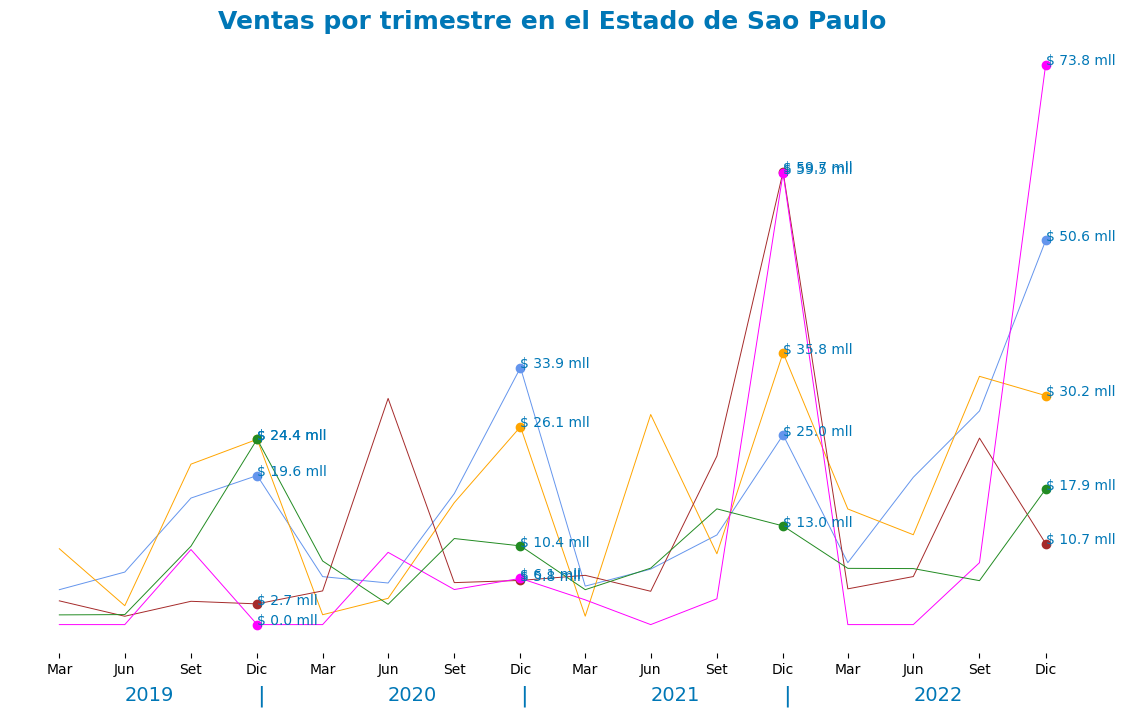

In [ ]:
df_visual=df_top5_productos_x_trimestre_final_visual.copy()
fig, ax = plt.subplots(figsize=(14,8))
productos_top5 = ['total_venta_camaras',	'total_venta_jeans',	'total_venta_lamparas',	'total_venta_Laptops',	'total_venta_higienico']
palette1=['orange','brown','magenta','forestgreen','cornflowerblue']

### Iterar sobre los valores en cada punto para agregar etiquetas
# for producto in productos_top5:
#   for i, row in df_visual.iterrows():
#       ax.text(row['fecha_pedido'], row[producto], row[producto], ha='right', va='bottom', fontsize=8, rotation=0, color='navy')


# productos_top5 = ['Cámaras digitales', 'Jeans', 'Lámparas LED', 'Laptops', 'Papel higiénico']
for i,producto in enumerate(productos_top5):
  ax.plot(df_visual['fecha_pedido'],df_visual[producto],marker="o",markevery=df['es_diciembre'],linewidth=0.7,color=palette1[i-1])
# ax.plot(df_visual['fecha_pedido'],df_visual['total_venta_jeans'],marker="o",markevery=df['es_diciembre'],color='red')


x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
x_labels_años=[2019,2020,2021,2022]*4
x_labels_año = df['año']
ax.set_xticks(df_visual.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

### texto en puntos del cuarto trimestre
for producto in productos_top5:
  for i in range(3, len(df_visual[producto]), 4):
    posicionX=ax.get_xticks()[i]
    posicionY=df_visual[producto][i]
    color_valor = '#0077b6'
    color_tri = 'black'
    ax.text(posicionX, posicionY, f'$ {posicionY:0.1f} mll',fontsize=10,color=color_valor)

# Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df_visual), 4):
    ax.text(df_visual['fecha_pedido'].iloc[i+1], -10,str(df['año'].iloc[i]), ha='left',fontsize=14,color='#0077b6')
    if i<12:
      ax.text(df_visual['fecha_pedido'].iloc[i+3], -10,'|', ha='left',fontsize=16,color='#0077b6')

plt.title('Ventas por trimestre en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')


plt.box([])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
insight = "¡Aumento significativo!\n¡Mejor trimestre!"
bbox_props = dict(boxstyle='round,pad=0.5',  fc='aliceblue', ec='navy', lw=.8)
plt.annotate(insight, xy=(df_visual['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
            ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
            arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# # Agrega una anotación resaltada con annotate
# insight = "¡Aumento significativo!\n¡Mejor trimestre!"
# bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='navy', lw=.8)
# plt.annotate(insight, xy=(df['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
#             ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
#             arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# ax.set_ylim(bottom=0, top=df_visual['total_venta'].max() + 90)  # Ajusta el rango superior según sea necesario

plt.show()

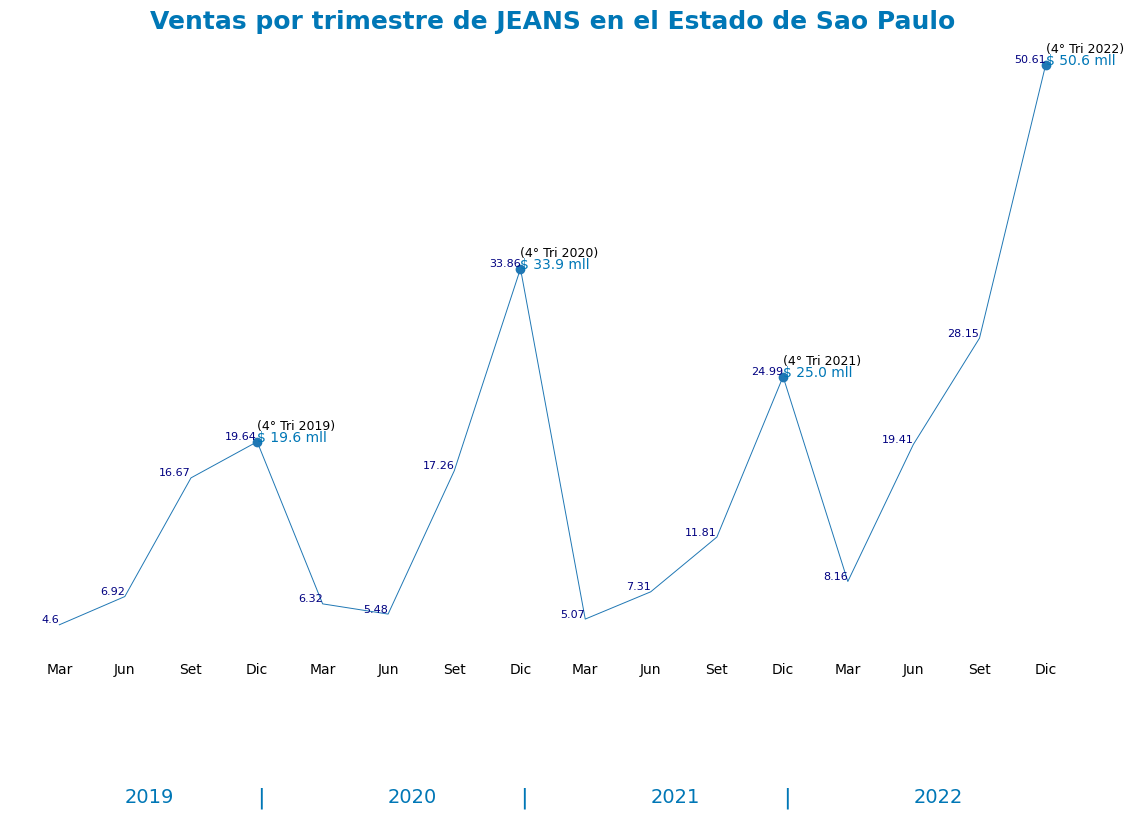

In [ ]:
df_visual_jeans=df_visulizar_ventas_x_trimestre_año_jeans.copy()
fig, ax = plt.subplots(figsize=(14,8))

# Iterar sobre los datos para agregar etiquetas
for i, row in df_visual_jeans.iterrows():
    ax.text(row['fecha_pedido'], row['total_venta'], row['total_venta'], ha='right', va='bottom', fontsize=8, rotation=0, color='navy')

ax.plot(df_visual_jeans['fecha_pedido'],df_visual_jeans['total_venta'],marker="o",markevery=df['es_diciembre'],linewidth=0.7)
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
x_labels_años=[2019,2020,2021,2022]*4
x_labels_año = df['año']
ax.set_xticks(df_visual_jeans.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

### texto en puntos del cuarto trimestre
for i in range(3, len(df_visual_jeans["total_venta"]), 4):
  posicionX=ax.get_xticks()[i]
  posicionY=df_visual_jeans["total_venta"][i]
  color_valor = '#0077b6'
  color_tri = 'black'
  ax.text(posicionX, posicionY, f'$ {posicionY:0.1f} mll',fontsize=10,color=color_valor)
  ax.text(posicionX, posicionY+1, f'(4° Tri {x_labels_año[i]})',fontsize=9,color=color_tri)

# Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df_visual_jeans), 4):
    ax.text(df_visual_jeans['fecha_pedido'].iloc[i+1], -10,str(df['año'].iloc[i]), ha='left',fontsize=14,color='#0077b6')
    if i<12:
      ax.text(df_visual_jeans['fecha_pedido'].iloc[i+3], -10,'|', ha='left',fontsize=16,color='#0077b6')

plt.title('Ventas por trimestre de JEANS en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')


plt.box([])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
insight = "¡Aumento significativo!\n¡Mejor trimestre!"
bbox_props = dict(boxstyle='round,pad=0.5',  fc='aliceblue', ec='navy', lw=.8)
plt.annotate(insight, xy=(df_visual_jeans['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
            ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
            arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# # Agrega una anotación resaltada con annotate
# insight = "¡Aumento significativo!\n¡Mejor trimestre!"
# bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='navy', lw=.8)
# plt.annotate(insight, xy=(df['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
#             ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
#             arrowprops=dict(facecolor='lightblue', edgecolor='navy', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# ax.set_ylim(bottom=0, top=df_visual_jeans['total_venta'].max() + 90)  # Ajusta el rango superior según sea necesario

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()

In [ ]:
# df es el dataframe para la gradica de ventas totales por trimestres desde 2019 al 2022:
df_nuevo=df_visual_jeans.copy()
df_mes_3 = df_nuevo[df_nuevo['mes'] == 3]
df_mes_6 = df_nuevo[df_nuevo['mes'] == 6]
df_mes_9 = df_nuevo[df_nuevo['mes'] == 9]
df_mes_12 = df_nuevo[df_nuevo['mes'] == 12]
df_mes_12

,fecha_pedido,total_venta,es_diciembre,año,mes
3,2019-12-31,19.64,True,2019,12
7,2020-12-31,33.86,True,2020,12
11,2021-12-31,24.99,True,2021,12
15,2022-12-31,50.61,True,2022,12


##entrenar modelo para prediccion JEANS

<ipython-input-213-a8f5ece95d72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-213-a8f5ece95d72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-213-a8f5ece95d72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

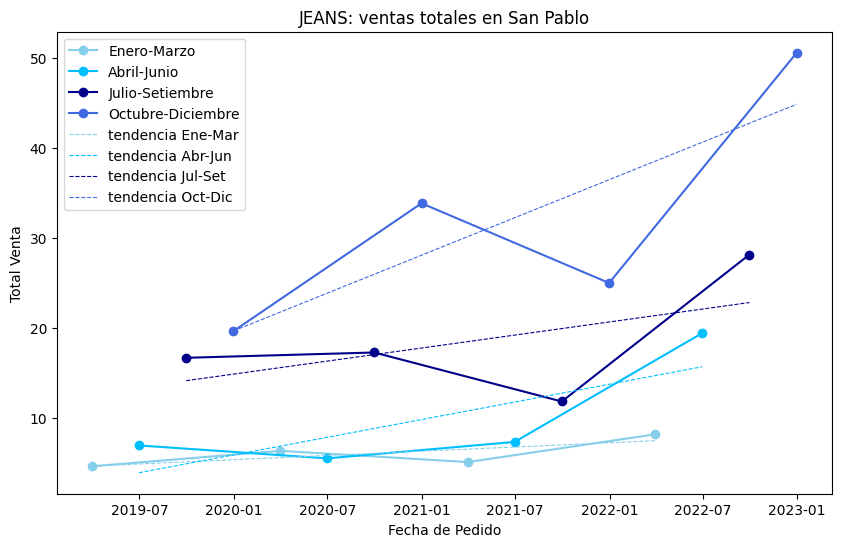

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir 'fecha_pedido' a timestamp:
df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_9['fecha_pedido_timestamp'] = df_mes_9['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_12['fecha_pedido_timestamp'] = df_mes_12['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds9

# Extraer X, Y para entrenar el modelo:
x_3 = df_mes_3['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_3= df_mes_3['total_venta'].values

x_6 = df_mes_6['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_6= df_mes_6['total_venta'].values

x_9 = df_mes_9['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_9= df_mes_9['total_venta'].values

x_12 = df_mes_12['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_12= df_mes_12['total_venta'].values

#Crear y ajustar el modelo de regresión lineal:
model_03 = LinearRegression()
model_06 = LinearRegression()
model_09 = LinearRegression()
model_012 = LinearRegression()

model_03.fit(x_3, y_3)
model_06.fit(x_6, y_6)
model_09.fit(x_9, y_9)
model_012.fit(x_12, y_12)

#############  fechas a predecir  #################
x_000=['2020-12-31','2021-12-31','2022-12-31','2023-12-31'] ### AGREGO '2023-12-31' PARA PREDECIR
x_000_series = pd.to_datetime(x_000)
x_000_series_reshaped = x_000_series.values.reshape(-1, 1)
x_000_series_reshaped
# y_000=model_12.predict(x_000_series_reshaped)
# print('PREDICCION: ', y_000)

# Prediccion de valores basados en el modelo de regresion lineal:
y_pred_3 = model_03.predict(x_3)
y_pred_6 = model_06.predict(x_6)
y_pred_9 = model_09.predict(x_9)
y_pred_12 = model_012.predict(x_12)


plt.figure(figsize=(10, 6))

plt.plot(df_mes_3['fecha_pedido'], df_mes_3['total_venta'], marker='o', label='Enero-Marzo', color='skyblue')
plt.plot(df_mes_6['fecha_pedido'], df_mes_6['total_venta'], marker='o', label='Abril-Junio', color='deepskyblue')
plt.plot(df_mes_9['fecha_pedido'], df_mes_9['total_venta'], marker='o', label='Julio-Setiembre', color='darkblue')
plt.plot(df_mes_12['fecha_pedido'], df_mes_12['total_venta'], marker='o', label='Octubre-Diciembre', color='royalblue')

# Trazar la lineas de tendencia:
plt.plot(df_mes_3['fecha_pedido'], y_pred_3, color='skyblue', label='tendencia Ene-Mar', linestyle='--', linewidth=.8)
plt.plot(df_mes_6['fecha_pedido'], y_pred_6, color='deepskyblue', label='tendencia Abr-Jun ', linestyle='--', linewidth=.8)
plt.plot(df_mes_9['fecha_pedido'], y_pred_9, color='darkblue', label='tendencia Jul-Set', linestyle='--', linewidth=.8)
plt.plot(df_mes_12['fecha_pedido'], y_pred_12, color='royalblue', label='tendencia Oct-Dic', linestyle='--', linewidth=.8)

plt.xlabel('Fecha de Pedido')
plt.ylabel('Total Venta')
plt.title('JEANS: ventas totales en San Pablo')
plt.legend()

plt.show()


In [ ]:
df_mes_3

,fecha_pedido,total_venta,es_diciembre,año,mes,fecha_pedido_timestamp
0,2019-03-31,4.60,False,2019,3,1.553990e+09
4,2020-03-31,6.32,False,2020,3,1.585613e+09
8,2021-03-31,5.07,False,2021,3,1.617149e+09
12,2022-03-31,8.16,False,2022,3,1.648685e+09


##ERRORES

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Calculo de error:
def calcular_error_y_mostrar_JEANS(modelo, x, y, trimestre):
    # Realizar predicciones
    y_pred = modelo.predict(x)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Calcular el error absoluto medio
    mae = mean_absolute_error(y, y_pred)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, y_pred)

    return f'{trimestre}\nMSE: {mse:.1f}\nMAE: ${mae:.1f}mll\nR2: {r2:.1%}'

# Calcular y mostrar el error para cada modelo
error_3_jeans=calcular_error_y_mostrar_JEANS(model_03, x_3, y_3, 'Enero-Marzo')
error_6_jeans=calcular_error_y_mostrar_JEANS(model_06, x_6, y_6, 'Abril-Junio')
error_9_jeans=calcular_error_y_mostrar_JEANS(model_09, x_9, y_9, 'Julio-Setiembre')
error_12_jeans=calcular_error_y_mostrar_JEANS(model_012, x_12, y_12, 'Octubre-Diciembre')
print('Errores: \n',error_3_jeans,'\n', error_6_jeans,'\n',error_9_jeans,'\n',error_12_jeans)

Errores: 
 Enero-Marzo
MSE: 0.8
MAE: $0.7mll
R2: 58.6% 
 Abril-Junio
MSE: 12.1
MAE: $3.4mll
R2: 61.5% 
 Julio-Setiembre
MSE: 25.2
MAE: $4.1mll
R2: 29.4% 
 Octubre-Diciembre
MSE: 49.6
MAE: $5.8mll
R2: 64.0%


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Calculo de error:
def calcular_error_jeans(modelo, x, y, trimestre):
    # Realizar predicciones
    y_pred = modelo.predict(x)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Calcular el error absoluto medio
    mae = mean_absolute_error(y, y_pred)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, y_pred)

    return mae.round(2),r2.round(2)

# Calcular y mostrar el error para cada modelo
error_3_jeans=calcular_error_jeans(model_03, x_3, y_3, 'Enero-Marzo')
error_6_jeans=calcular_error_jeans(model_06, x_6, y_6, 'Abril-Junio')
error_9_jeans=calcular_error_jeans(model_09, x_9, y_9, 'Julio-Setiembre')
error_12_jeans=calcular_error_jeans(model_012, x_12, y_12, 'Octubre-Diciembre')
errores_jeans=[error_3_jeans,error_6_jeans,error_9_jeans,error_12_jeans]
errores_jeans

[(0.73, 0.59), (3.39, 0.61), (4.06, 0.29), (5.76, 0.64)]

In [ ]:
######## PREDICCION DE TENDENCIA DE VALORES CONSIDERANDO TRIMESTRES POR AÑO 2023   #########
from datetime import datetime

x_predic_3 = ['2020-3-31', '2021-3-31', '2022-3-31', '2023-3-31'] ### predecir en el primer trimestre
x_predic_6 = ['2020-6-30', '2021-6-30', '2022-6-30', '2023-6-30'] ### segundo
x_predic_9 = ['2020-9-30', '2021-9-30', '2022-9-30', '2023-9-30'] ### tercero
x_predic_12 = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31'] ### cuarto
df_fechas = pd.DataFrame({'fechas_3': x_predic_3,'fechas_6':x_predic_6,'fechas_9':x_predic_9,'fechas_12':x_predic_12})

df_fechas['fechas_3'] = pd.to_datetime(df_fechas['fechas_3'])
df_fechas['fechas_6'] = pd.to_datetime(df_fechas['fechas_6'])
df_fechas['fechas_9'] = pd.to_datetime(df_fechas['fechas_9'])
df_fechas['fechas_12'] = pd.to_datetime(df_fechas['fechas_12'])

x_predic_3= df_fechas['fechas_3'].astype(int) / 10**9
x_predic_3_array = x_predic_3.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_6= df_fechas['fechas_6'].astype(int) / 10**9
x_predic_6_array = x_predic_6.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_9= df_fechas['fechas_9'].astype(int) / 10**9
x_predic_9_array = x_predic_9.values.reshape(-1, 1) ### convierte la serie en un array

x_predic_12= df_fechas['fechas_12'].astype(int) / 10**9
x_predic_12_array = x_predic_12.values.reshape(-1, 1) ### convierte la serie en un array

###   TRATANDO FECHAS PARA EL NUEVO DF PARA GRAFICAR   ###
x_predic_3_array_datetime = datetime.utcfromtimestamp(x_predic_3_array[-1:][0][0])
fecha_formato_str_3 = x_predic_3_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_3 = int(x_predic_3_array_datetime.strftime('%Y'))
fecha_formato_str_month_3 = int(x_predic_3_array_datetime.strftime('%m'))

x_predic_6_array_datetime = datetime.utcfromtimestamp(x_predic_6_array[-1:][0][0])
fecha_formato_str_6 = x_predic_6_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_6 = int(x_predic_6_array_datetime.strftime('%Y'))
fecha_formato_str_month_6 = int(x_predic_6_array_datetime.strftime('%m'))

x_predic_9_array_datetime = datetime.utcfromtimestamp(x_predic_9_array[-1:][0][0])
fecha_formato_str_9 = x_predic_9_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_9 = int(x_predic_9_array_datetime.strftime('%Y'))
fecha_formato_str_month_9 = int(x_predic_9_array_datetime.strftime('%m'))

x_predic_12_array_datetime = datetime.utcfromtimestamp(x_predic_12_array[-1:][0][0])
fecha_formato_str_12 = x_predic_12_array_datetime.strftime('%Y-%m-%d') # Convertir la fecha a un formato específico (aaaa-mm-dd)
fecha_formato_str_year_12 = int(x_predic_12_array_datetime.strftime('%Y'))
fecha_formato_str_month_12 = int(x_predic_12_array_datetime.strftime('%m'))


y_predic_3= round((model_03.predict(x_predic_3_array))[-1:][0],2)
y_predic_6= round((model_06.predict(x_predic_6_array))[-1:][0],2)
y_predic_9= round((model_09.predict(x_predic_9_array))[-1:][0],2)
y_predic_12= round((model_012.predict(x_predic_12_array))[-1:][0],2)

print('PREDICCION: ', y_predic_3,'  -  ', y_predic_6,'  -  ', y_predic_9,'  -  ', y_predic_12)
print('fECHAS: ', fecha_formato_str_3,'  -  ', fecha_formato_str_6,'  -  ', fecha_formato_str_9,'  -  ', fecha_formato_str_12)


#### AGREGAR FILAS AL DF ORIGINAL  ####
nueva_fila_3 = {'fecha_pedido':fecha_formato_str_3 , 'total_venta': y_predic_3, 'es_diciembre': False, 'año': fecha_formato_str_year_3, 'mes': fecha_formato_str_month_3}
nueva_fila_6 = {'fecha_pedido': fecha_formato_str_6, 'total_venta': y_predic_6, 'es_diciembre': False, 'año': fecha_formato_str_year_6, 'mes': fecha_formato_str_month_6}
nueva_fila_9 = {'fecha_pedido': fecha_formato_str_9, 'total_venta': y_predic_9, 'es_diciembre': False, 'año': fecha_formato_str_year_9, 'mes': fecha_formato_str_month_9}
nueva_fila_12 = {'fecha_pedido': fecha_formato_str_12, 'total_venta': y_predic_12, 'es_diciembre': True, 'año': fecha_formato_str_year_12, 'mes': fecha_formato_str_month_12}

# df_new=df.copy()
df_new_jeans=df_visulizar_ventas_x_trimestre_año_jeans.copy()

df_new_jeans = df_new_jeans.append(nueva_fila_3, ignore_index=True) #adicionar fila
df_new_jeans = df_new_jeans.append(nueva_fila_6, ignore_index=True)
df_new_jeans = df_new_jeans.append(nueva_fila_9, ignore_index=True)
df_new_jeans = df_new_jeans.append(nueva_fila_12, ignore_index=True)
df_new_jeans['fecha_pedido'] = pd.to_datetime(df_new_jeans['fecha_pedido']) # corregir fechas

df_new_jeans

PREDICCION:  8.39   -   19.6   -   25.71   -   53.27
fECHAS:  2023-03-31   -   2023-06-30   -   2023-09-30   -   2023-12-31


<ipython-input-217-e5e943d566fc>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_jeans = df_new_jeans.append(nueva_fila_3, ignore_index=True) #adicionar fila
<ipython-input-217-e5e943d566fc>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_jeans = df_new_jeans.append(nueva_fila_6, ignore_index=True)
<ipython-input-217-e5e943d566fc>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_jeans = df_new_jeans.append(nueva_fila_9, ignore_index=True)
<ipython-input-217-e5e943d566fc>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_jeans = df_new_jeans.append(nueva_fila_12, ignore_index=True)


,fecha_pedido,total_venta,es_diciembre,año,mes
0,2019-03-31,4.60,False,2019,3
1,2019-06-30,6.92,False,2019,6
2,2019-09-30,16.67,False,2019,9
3,2019-12-31,19.64,True,2019,12
4,2020-03-31,6.32,False,2020,3
5,2020-06-30,5.48,False,2020,6
6,2020-09-30,17.26,False,2020,9
7,2020-12-31,33.86,True,2020,12
8,2021-03-31,5.07,False,2021,3
9,2021-06-30,7.31,False,2021,6


In [ ]:
errores_jeans[1][0]

3.39

<function matplotlib.pyplot.show(close=None, block=None)>

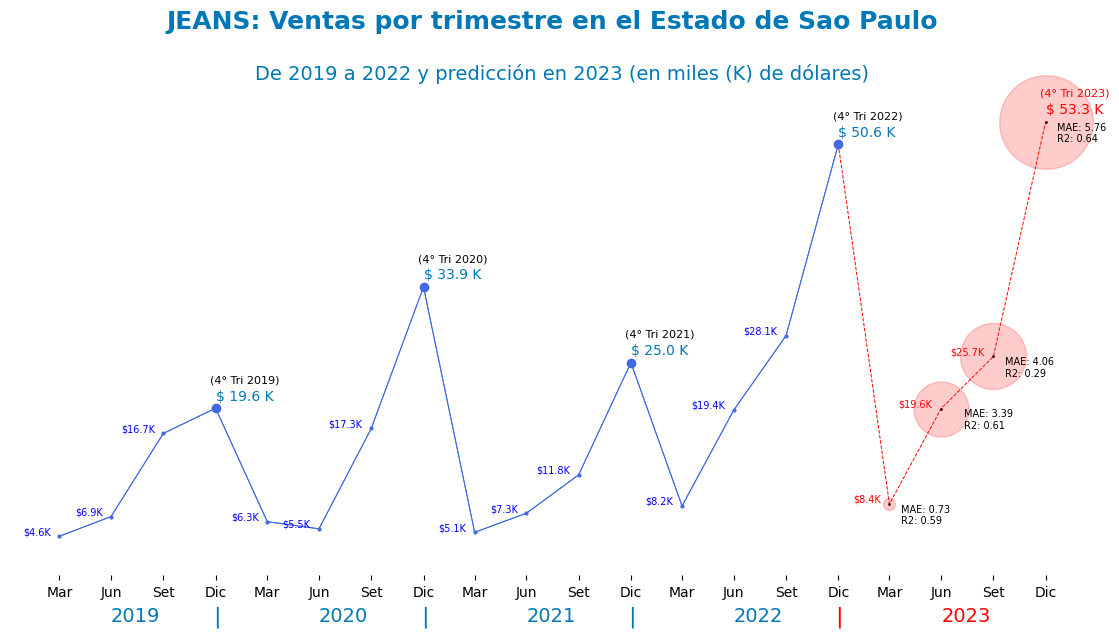

In [ ]:
df=df_new_jeans.copy()

fig, ax = plt.subplots(figsize=(14,7))

# Datos para agregar etiquetas
for i, row in df[:-1].iterrows(): ### df[:-1]: para evitar el último valor
    index = df.index
    if i<16:
      color = 'red' if i not in index else 'blue' if i != 7 and i % 4 != 3 else 'white'
    else:
      color = 'red' if i not in index else 'red' if i != 7 and i % 4 != 3 else 'white'
    ax.text(row['fecha_pedido']-pd.DateOffset(days=15), row['total_venta'], f'${row["total_venta"]:.1f}K', ha='right', va='bottom', fontsize=7, rotation=0, color=color)

# Etiqueta de errores en predicciones:
ax.text((df['fecha_pedido'][16])+pd.DateOffset(days=20), df['total_venta'][16], f'MAE: {errores_jeans[0][0]}\nR2: {errores_jeans[0][1]}', ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][17])+pd.DateOffset(days=40), df['total_venta'][17], f'MAE: {errores_jeans[1][0]}\nR2: {errores_jeans[1][1]}', ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][18])+pd.DateOffset(days=20), df['total_venta'][18], f'MAE: {errores_jeans[2][0]}\nR2: {errores_jeans[2][1]}', ha='left', va='top', fontsize=7,)
ax.text((df['fecha_pedido'][19])+pd.DateOffset(days=20), df['total_venta'][19], f'MAE: {errores_jeans[3][0]}\nR2: {errores_jeans[3][1]}', ha='left', va='top', fontsize=7,)

# Graficar ventas en función de trimestres:
mask = df.index[-5:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], color='red', label='Diciembre',linewidth=0.7,markersize=5, linestyle='--' )
mask = df.index[-4:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='black', label='Diciembre',markersize=1, linestyle='' )

### Burbuja del error: MAE
mask = df.index[-4:-3]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_jeans[0][0]*11.7, linestyle='', alpha=.2)
mask = df.index[-3:-2]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_jeans[1][0]*11.7, linestyle='', alpha=.2)
mask = df.index[-2:-1]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_jeans[2][0]*11.7, linestyle='', alpha=.2)
mask = df.index[-1:]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='red', label=f'Diciembre_{i}', linewidth=0.7, markersize=errores_jeans[3][0]*11.7, linestyle='', alpha=.2)
# ax.plot(df.loc[mask, 'fecha_pedido'], 60, marker="o", color='black', label=f'Diciembre_{i}', linewidth=0.7, markersize=1, linestyle='', alpha=1)

# Condicionar el color de los últimos 4 puntos
mask = df.index[:-4]
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", markevery=df.loc[mask, 'es_diciembre'], color='royalblue', label='Diciembre',linewidth=0.7)
ax.plot(df.loc[mask, 'fecha_pedido'], df.loc[mask, 'total_venta'], marker="o", color='royalblue', label='Diciembre',linewidth=0.7,markersize=2)

## Colocar xticks
x_labels = ["Mar", "Jun", "Set", "Dic"] * 5
x_labels_años=[2019,2020,2021,2022,2023]*4
x_labels_año = df['año']
ax.set_xticks(df.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

## texto en puntos del cuarto trimestre
for i in range(3, len(df["total_venta"]), 4):
  posicionX=ax.get_xticks()[i]
  posicionY=df["total_venta"][i]
  if i<16:
      color_valor = '#0077b6'
      color_tri = 'black'
  else:
      color_valor = 'red'
      color_tri = 'red'
  ax.text(posicionX, posicionY+1, f'$ {posicionY:0.1f} K',fontsize=10,color=color_valor)
  ax.text(posicionX-10, posicionY+3, f'(4° Tri {x_labels_año[i]})',fontsize=8,color=color_tri)
  # ax.text(posicionX*1.005, posicionY+1.15, f'(4° Tri {x_labels_año[i]})',fontsize=8,color=color_tri)

### Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df), 4):
    if i<=12:
      ax.text(df['fecha_pedido'].iloc[i+1], df['total_venta'].min()-10,str(df['año'].iloc[i]), ha='left',fontsize=14,color='#0077b6')
    else:
      ax.text(df['fecha_pedido'].iloc[i+1], df['total_venta'].min()-10,str(df['año'].iloc[i]), ha='left',fontsize=14,color='red')

    if i<12:
      ax.text(df['fecha_pedido'].iloc[i+3]-pd.DateOffset(days=5), df['total_venta'].min()-10,'|', ha='left',fontsize=16,color='#0077b6')
    elif i<16:
      ax.text(df['fecha_pedido'].iloc[i+3]-pd.DateOffset(days=5), df['total_venta'].min()-10,'|', ha='left',fontsize=16,color='red')

### Título
plt.title('JEANS: Ventas por trimestre en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')
### Subtítulo
ax.text((df['fecha_pedido'].iloc[3])+pd.DateOffset(days=70),df['total_venta'].max()+5,'De 2019 a 2022 y predicción en 2023 (en miles (K) de dólares)', fontsize=14,color='#0077b6')

plt.box([])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
# insight = "¡Aumento significativo!\n¡Mejor trimestre!"
# bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='royalblue', lw=.8)
# plt.annotate(insight, xy=(df['fecha_pedido'].iloc[15], 307), xytext=(df['fecha_pedido'].iloc[9], 340),
#             ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
#             arrowprops=dict(facecolor='lightblue', edgecolor='royalblue', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

# Agrega una anotación resaltada con annotate
# insight = "PREDICCIONES"
# bbox_props = dict(boxstyle='round,pad=0.5', fc='aliceblue', ec='red', lw=.8)
# plt.annotate(insight, xy=(df['fecha_pedido'].iloc[-1], 365), xytext=(df['fecha_pedido'].iloc[14], 400),
#             ha='center', va='center', fontsize=10, color='red', bbox=bbox_props,
#             arrowprops=dict(facecolor='lightblue', edgecolor='red', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))

ax.set_ylim(bottom=0, top=df['total_venta'].max() + 10)  # Ajusta el rango superior según sea necesario
plt.show